In [59]:
library( tidyverse )
library( highcharter )
library( knitr )
library( pander )
library( tidyverse )
library( ggplot2 )
library( doBy )
library( xtable )
library( ggthemes )
library( kableExtra )
library( viridis )
library( DiagrammeR )
library( magrittr )
library( RColorBrewer )
library(webshot)
library(hash)
library( miceadds )
library(zoo)
library(dplyr)
library(caret)
library(chron)
library(moments)

In [99]:
load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_modello.Rdata")
df <- DatiUsati1
rm(DatiUsati1)

In [100]:
df <- df[c("patientKey","icuAdmDate__icuAdmDate","icuAdmDate__icuAdmTime","centreCode","genderClear","age","degenzaPreTra","admWard_RIC_PED",
           "typeStatus_RIC","pulmonarHypertension","epatopulmonarSyndrome",
           "BleedingEsophagGastric","prevLiverTransplant","presentRefractAscites","tipps","leastOneEpathenal",
           "leastOneSpontaneousBacterial","thrombosisDegreeWithNone","portosystEncephalPresent","nutritStatus",
           "surgeonSurgery","mechanicVentilation","clifSofaForCardio","albumInfusOver7Days",
           "bilirubinaTotale","INR","serumCreatinine","Sodiemia","ratioPaO2FiO2","platCountTranspl","albumina",
           "surgeryDuration","IntraoperativTransfected","plasmaFresco","plasmaPools","doseFibrinogen","CRIOprecipitated",
           "useEmorecuper","CristalloidiComp","ColloidiComp","Albumina50Comp",
           "noradrenalineEndSurger","intermedLactates","coldIschemia","syndromeReperfus",
           "shuntPortedTemp", "anastomTechnic","venousBypass","bileAnastomosis","abdomOpenEndSurg",
           "scoreCHILD","organDonorSex","organDonorType","organDonorSampleTechnic","organDonorECMO",
           "regionalPerfusion","organDonorBiopsy","organDonorRecondOrgan",
           "organDonorProvenance","organDonorCauseOfDeath","organDonorAge", "organDonorHeight",
           "organDonorDrawalSodiemia","organDonorGammaGT","realMELD","realMELDNa","DRI","EDRI", "degenzaPostTraOSP",
           "hospOutcome_RIC","icuMortality",
           "liverDisords_buddChiariSyndrome","liverDisords_cirrhosisAlcoholic","liverDisords_cirrhosisAutoimmune","liverDisords_cirrhosisBiliaryPrimitiv",
              "liverDisords_cirrhosisBiliarySecond","liverDisords_cirrhosisCryptogenetic","liverDisords_cirrhosisDrugs","liverDisords_cirrhosisOtherRaison",
              "liverDisords_cirrhosisVirusB","liverDisords_cirrhosisVirusC","liverDisords_cirrhosisVirusD","liverDisords_cirrhosisVirusOther","liverDisords_extraEpathiBileDucts",
              "liverDisords_HCCstageI","liverDisords_HCCstageII","liverDisords_Hemochromatosis","liverDisords_hepatFulm","liverDisords_NASHpathology",
              "liverDisords_otherCholestaticDisease","liverDisords_otherCongenitBilia","liverDisords_otherIndication","liverDisords_polycysticDisease",
              "liverDisords_primitScleroColangitis","liverDisords_subAcute","liverDisords_wilsonDisease",
          "tip_ritr","oxygenTherapy","frequency","degree","organDonorMaastricht",
           "organDonorSteadyMacroscopic","organDonorRecondHypoNormoter",
          "comorbidities_none_RIC","comorbidities_asthma_RIC","comorbidities_modCOPD_RIC","comorbidities_sevCOPD_RIC",
        "comorbidities_restLunDis_RIC","comorbidities_hypertension_RIC","comorbidities_myocard_RIC","comorbidities_heartFail2_RIC",
        "comorbidities_heartFail4_RIC","comorbidities_arrhythmia_RIC","comorbidities_perVascDis_RIC","comorbidities_dementia_RIC",
        "comorbidities_cerDis_RIC","comorbidities_hemiParaQuadr_RIC","comorbidities_neuro_RIC","comorbidities_modRenal_RIC",
        "comorbidities_diab1_RIC","comorbidities_diab2NoIns_RIC","comorbidities_diab2Ins_RIC","comorbidities_drugIndCoag_RIC",
        "comorbidities_antiaggrTherapy_RIC","comorbidities_severePsychosis_RIC")]

In [101]:
listsub <- c("tip_ritr","oxygenTherapy","frequency","degree","organDonorMaastricht", "organDonorSteadyMacroscopic","organDonorRecondHypoNormoter")

In [102]:

listLivDis<-c("liverDisords_buddChiariSyndrome","liverDisords_cirrhosisAlcoholic","liverDisords_cirrhosisAutoimmune","liverDisords_cirrhosisBiliaryPrimitiv",
              "liverDisords_cirrhosisBiliarySecond","liverDisords_cirrhosisCryptogenetic","liverDisords_cirrhosisDrugs","liverDisords_cirrhosisOtherRaison",
              "liverDisords_cirrhosisVirusB","liverDisords_cirrhosisVirusC","liverDisords_cirrhosisVirusD","liverDisords_cirrhosisVirusOther","liverDisords_extraEpathiBileDucts",
              "liverDisords_HCCstageI","liverDisords_HCCstageII","liverDisords_Hemochromatosis","liverDisords_hepatFulm","liverDisords_NASHpathology",
              "liverDisords_otherCholestaticDisease","liverDisords_otherCongenitBilia","liverDisords_otherIndication","liverDisords_polycysticDisease",
              "liverDisords_primitScleroColangitis","liverDisords_subAcute","liverDisords_wilsonDisease")




In [103]:
fix_multi <- function(dati,lista){

   for (i in lista){
      levels(dati[[i]]) <- c(levels(dati[[i]]),0)
      dati[[i]][is.na(dati[[i]])] <- 0
   }

   return(dati)
}


In [104]:
#fill NA with 0 for pop up variables and multi choice vriables
df <- fix_multi(df, listLivDis)

In [105]:
df <- fix_multi(df,listsub)

In [106]:
dim(df)

[1] 1188  125

# Data exploration

In [67]:
rownames(df) <- NULL
head(df)

patientKey,icuAdmDate__icuAdmDate,icuAdmDate__icuAdmTime,centreCode,genderClear,age,degenzaPreTra,admWard_RIC_PED,typeStatus_RIC,pulmonarHypertension,...,comorbidities_cerDis_RIC,comorbidities_hemiParaQuadr_RIC,comorbidities_neuro_RIC,comorbidities_modRenal_RIC,comorbidities_diab1_RIC,comorbidities_diab2NoIns_RIC,comorbidities_diab2Ins_RIC,comorbidities_drugIndCoag_RIC,comorbidities_antiaggrTherapy_RIC,comorbidities_severePsychosis_RIC
P-IT126-4695,2018-10-09,12:57,IT126,Female,65,1,medicalWard,emergSurgical,responsNo,...,1,0,0,0,0,0,1,0,0,0
P-IT126-4708,2018-10-12,18:27,IT126,Female,28,1,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,0,0,0,0
P-IT126-4709,2018-10-13,18:08,IT126,Male,69,1,otherIcu,emergSurgical,responsNo,...,0,0,0,0,0,1,0,0,0,0
P-IT126-4715,2018-10-16,14:20,IT126,Male,50,1,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,1,0,0,0
P-IT126-4729,2018-10-23,15:20,IT126,Male,48,1,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,0,0,0,0
P-IT126-4090,2018-10-29,15:22,IT126,Male,19,42,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,0,0,0,0


In [68]:
str(df)

'data.frame':	1188 obs. of  125 variables:
 $ patientKey                           : chr  "P-IT126-4695" "P-IT126-4708" "P-IT126-4709" "P-IT126-4715" ...
 $ icuAdmDate__icuAdmDate               : Date, format: "2018-10-09" "2018-10-12" ...
 $ icuAdmDate__icuAdmTime               : chr  "12:57" "18:27" "18:08" "14:20" ...
 $ centreCode                           : chr  "IT126" "IT126" "IT126" "IT126" ...
 $ genderClear                          : Factor w/ 2 levels "Male","Female": 2 2 1 1 1 1 1 1 2 2 ...
 $ age                                  : num  65 28 69 50 48 19 47 58 61 58 ...
 $ degenzaPreTra                        : num  1 1 1 1 1 42 0 1 1 1 ...
 $ admWard_RIC_PED                      : Factor w/ 6 levels "medicalWard",..: 1 1 4 1 1 1 1 1 1 1 ...
 $ typeStatus_RIC                       : Factor w/ 3 levels "nonSurgical",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ pulmonarHypertension                 : Factor w/ 2 levels "responsNo","responsYes": 1 1 1 1 1 1 1 1 1 1 ...
 $ epatopulmonarSyndro

In [69]:
summary(df)

  patientKey        icuAdmDate__icuAdmDate icuAdmDate__icuAdmTime
 Length:1188        Min.   :2018-09-26     Length:1188           
 Class :character   1st Qu.:2019-11-07     Class :character      
 Mode  :character   Median :2020-08-25     Mode  :character      
                    Mean   :2020-08-01                           
                    3rd Qu.:2021-05-02                           
                    Max.   :2021-12-31                           
                                                                 
  centreCode        genderClear       age        degenzaPreTra    
 Length:1188        Male  :839   Min.   :14.00   Min.   :  0.000  
 Class :character   Female:349   1st Qu.:52.00   1st Qu.:  0.000  
 Mode  :character                Median :58.00   Median :  1.000  
                                 Mean   :56.26   Mean   :  6.203  
                                 3rd Qu.:63.00   3rd Qu.:  2.000  
                                 Max.   :75.00   Max.   :304.000  
   

In [70]:
library(DataExplorer)
introduce(data = df)

Warning message:
"package 'DataExplorer' was built under R version 3.6.3"


rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
1188,125,94,31,0,1463,747,148500,940120


In [71]:
aggregate(sapply(df,class), by=list(sapply(df,class)), FUN=length)

Group.1,x
character,3
Date,1
factor,90
numeric,31


In [72]:
options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)

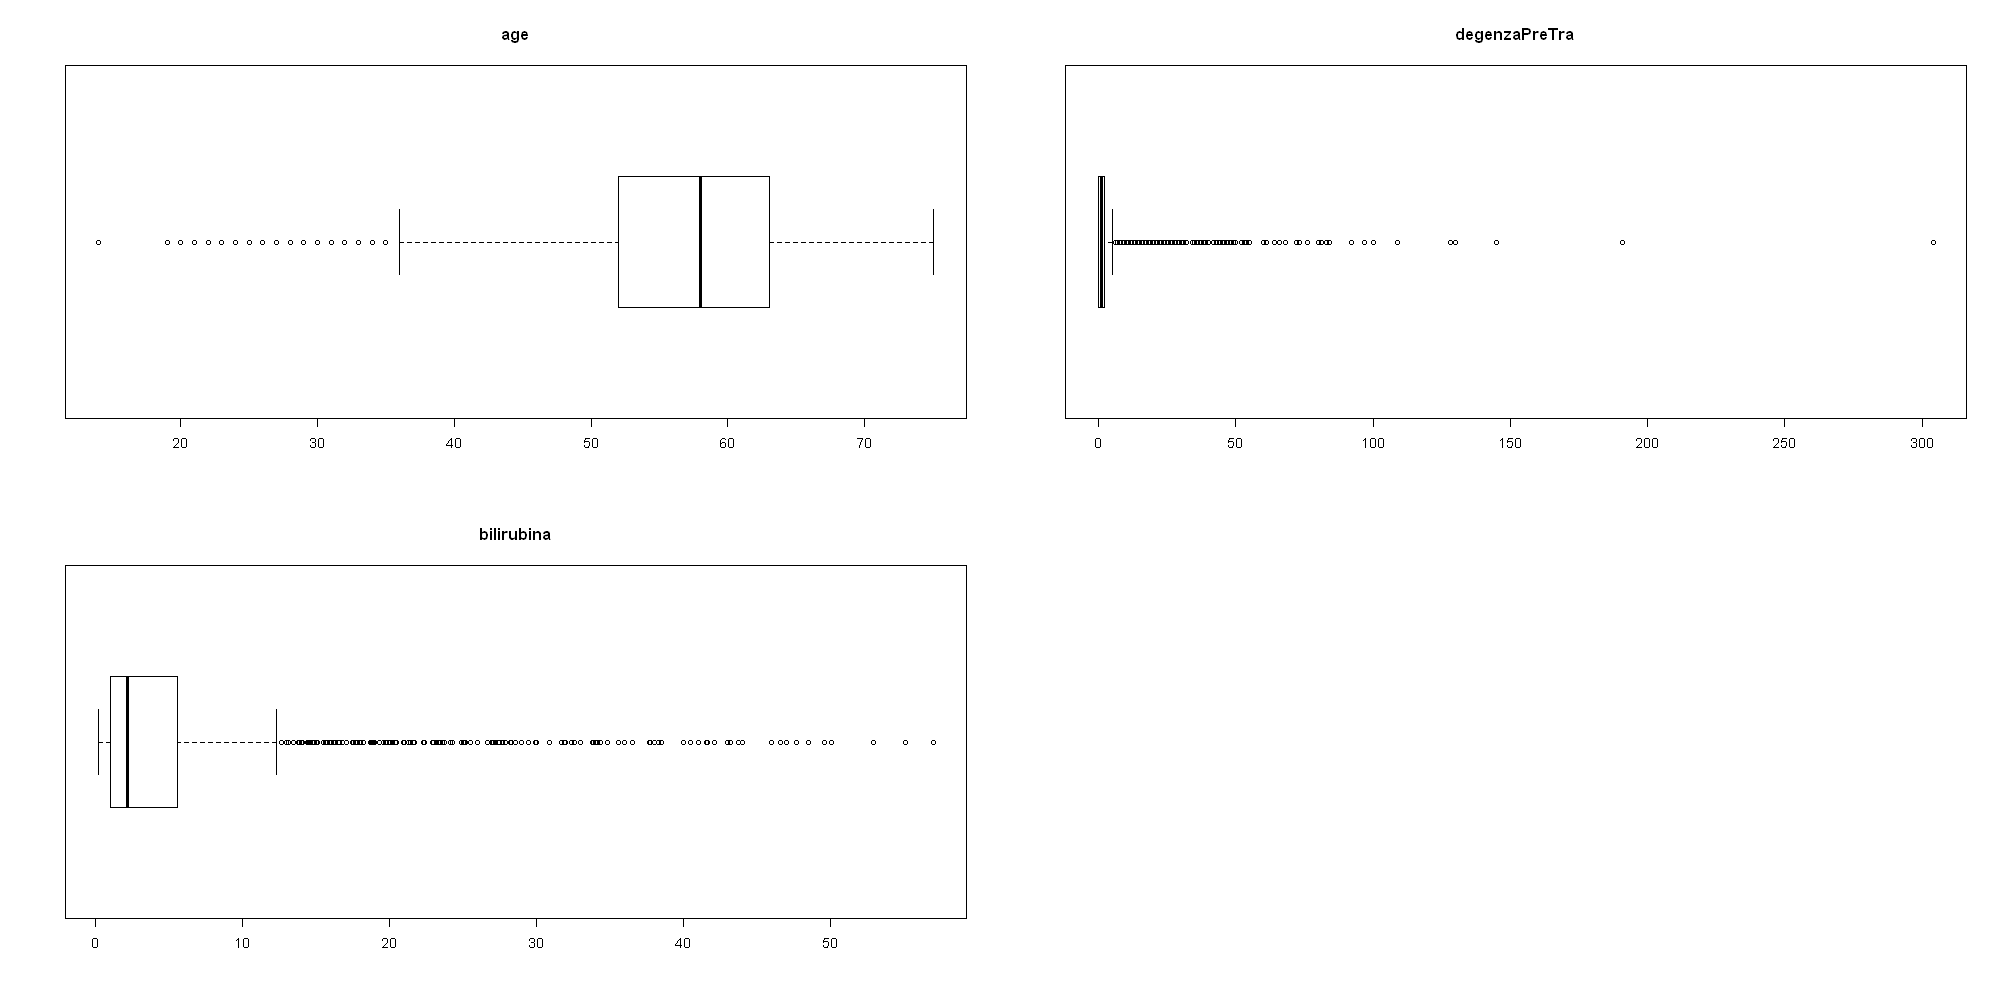

In [73]:
par(mfrow=c(2,2))

boxplot(df$age, horizontal = T, main="age")

boxplot(df$degenzaPreTra,horizontal = T,main="degenzaPreTra")


boxplot(df$bilirubinaTotale,horizontal = T, main="bilirubina")

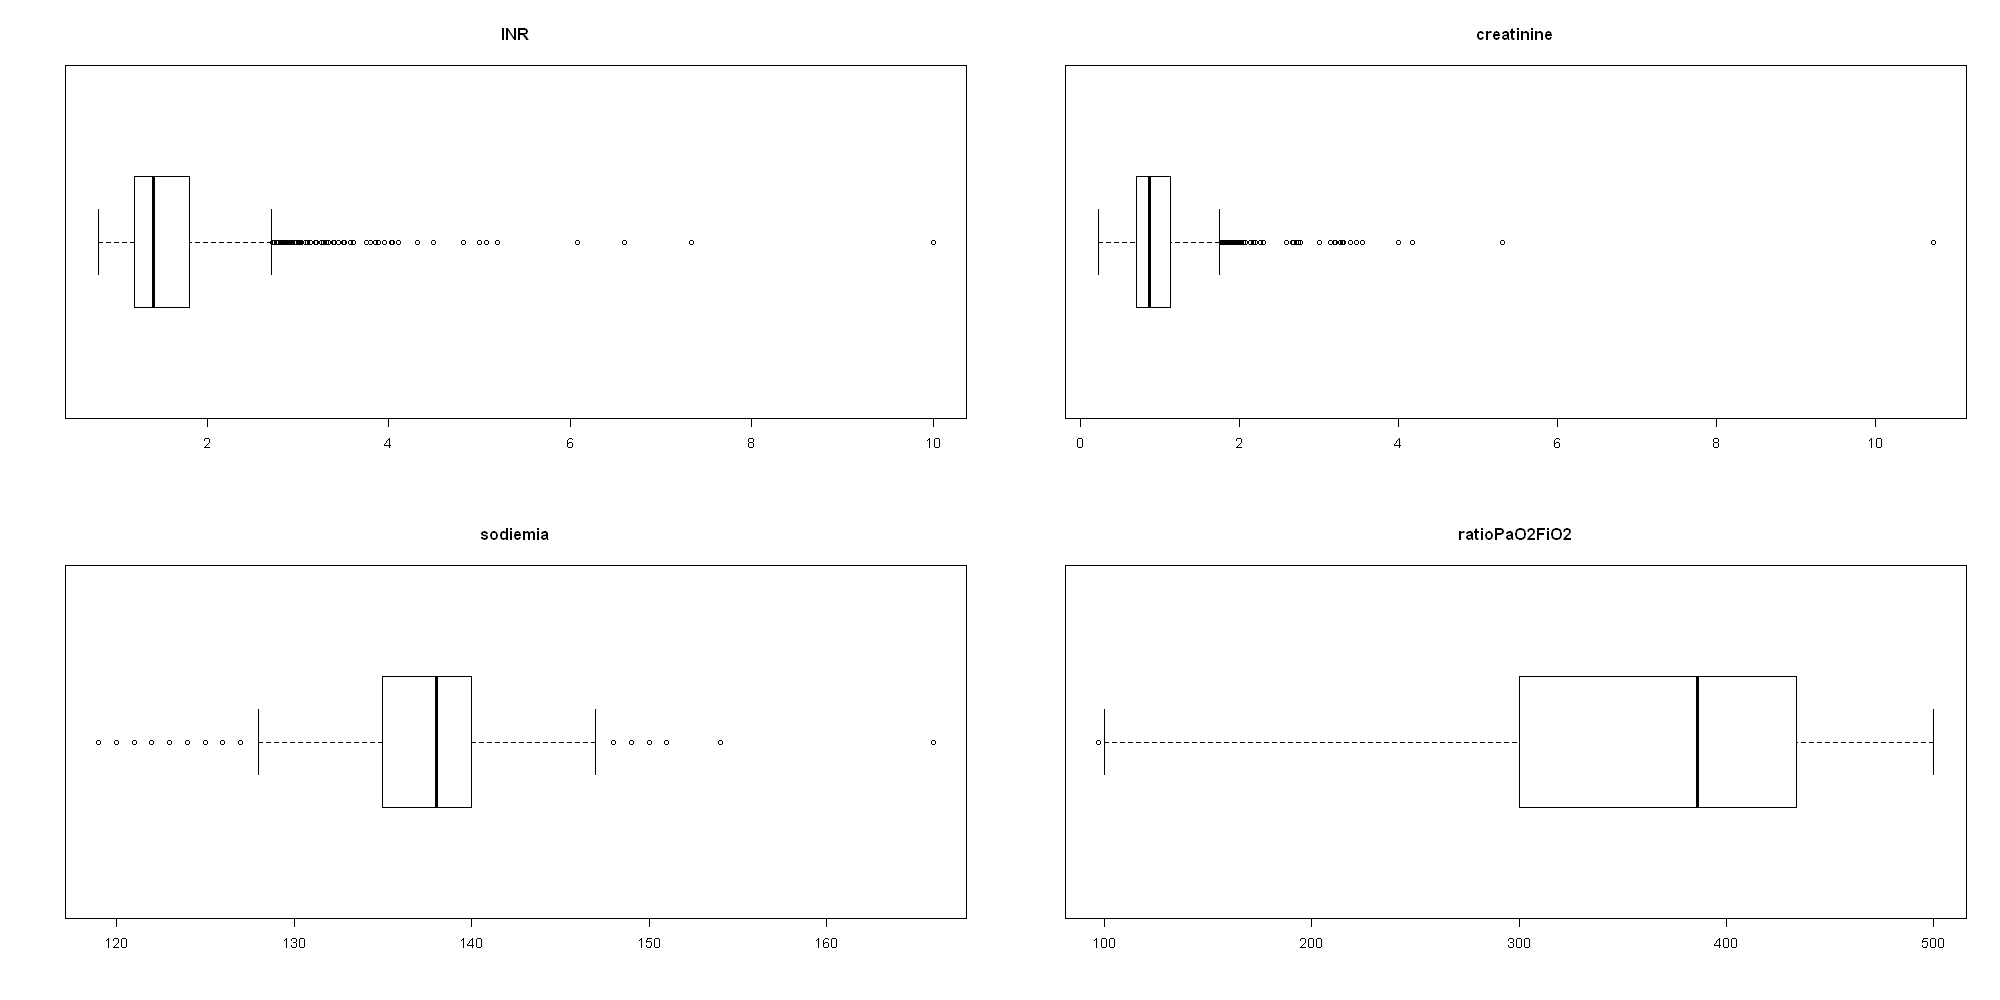

In [667]:
par(mfrow=c(2,2))

boxplot(df$INR,horizontal = T,main="INR")

boxplot(df$serumCreatinine,horizontal = T,main="creatinine")

boxplot(df$Sodiemia,horizontal = T,main="sodiemia")

boxplot(df$ratioPaO2FiO2,horizontal = T, main="ratioPaO2FiO2")

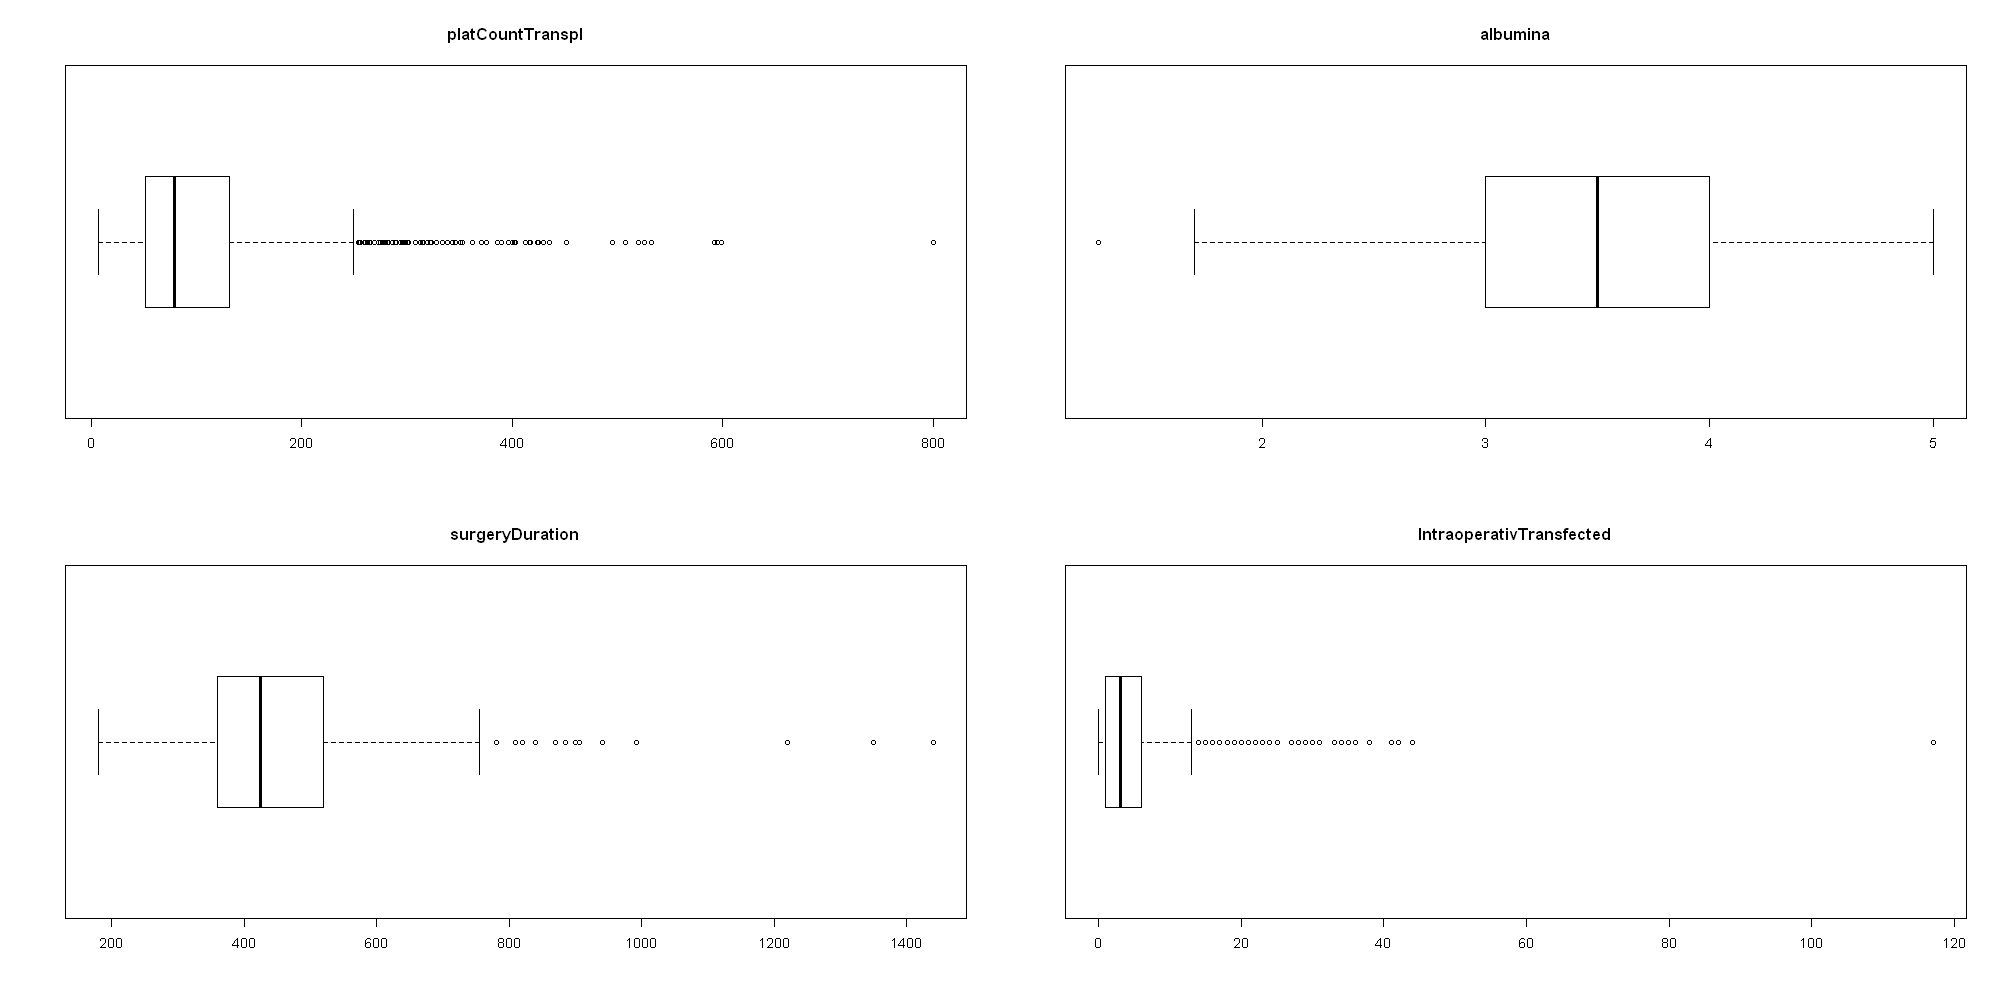

In [668]:
par(mfrow=c(2,2))

boxplot(df$platCountTranspl,horizontal = T,main="platCountTranspl")

boxplot(df$albumina,horizontal = T,main="albumina")

boxplot(df$surgeryDuration,horizontal = T,main="surgeryDuration")

boxplot(df$IntraoperativTransfected,horizontal = T, main="IntraoperativTransfected")

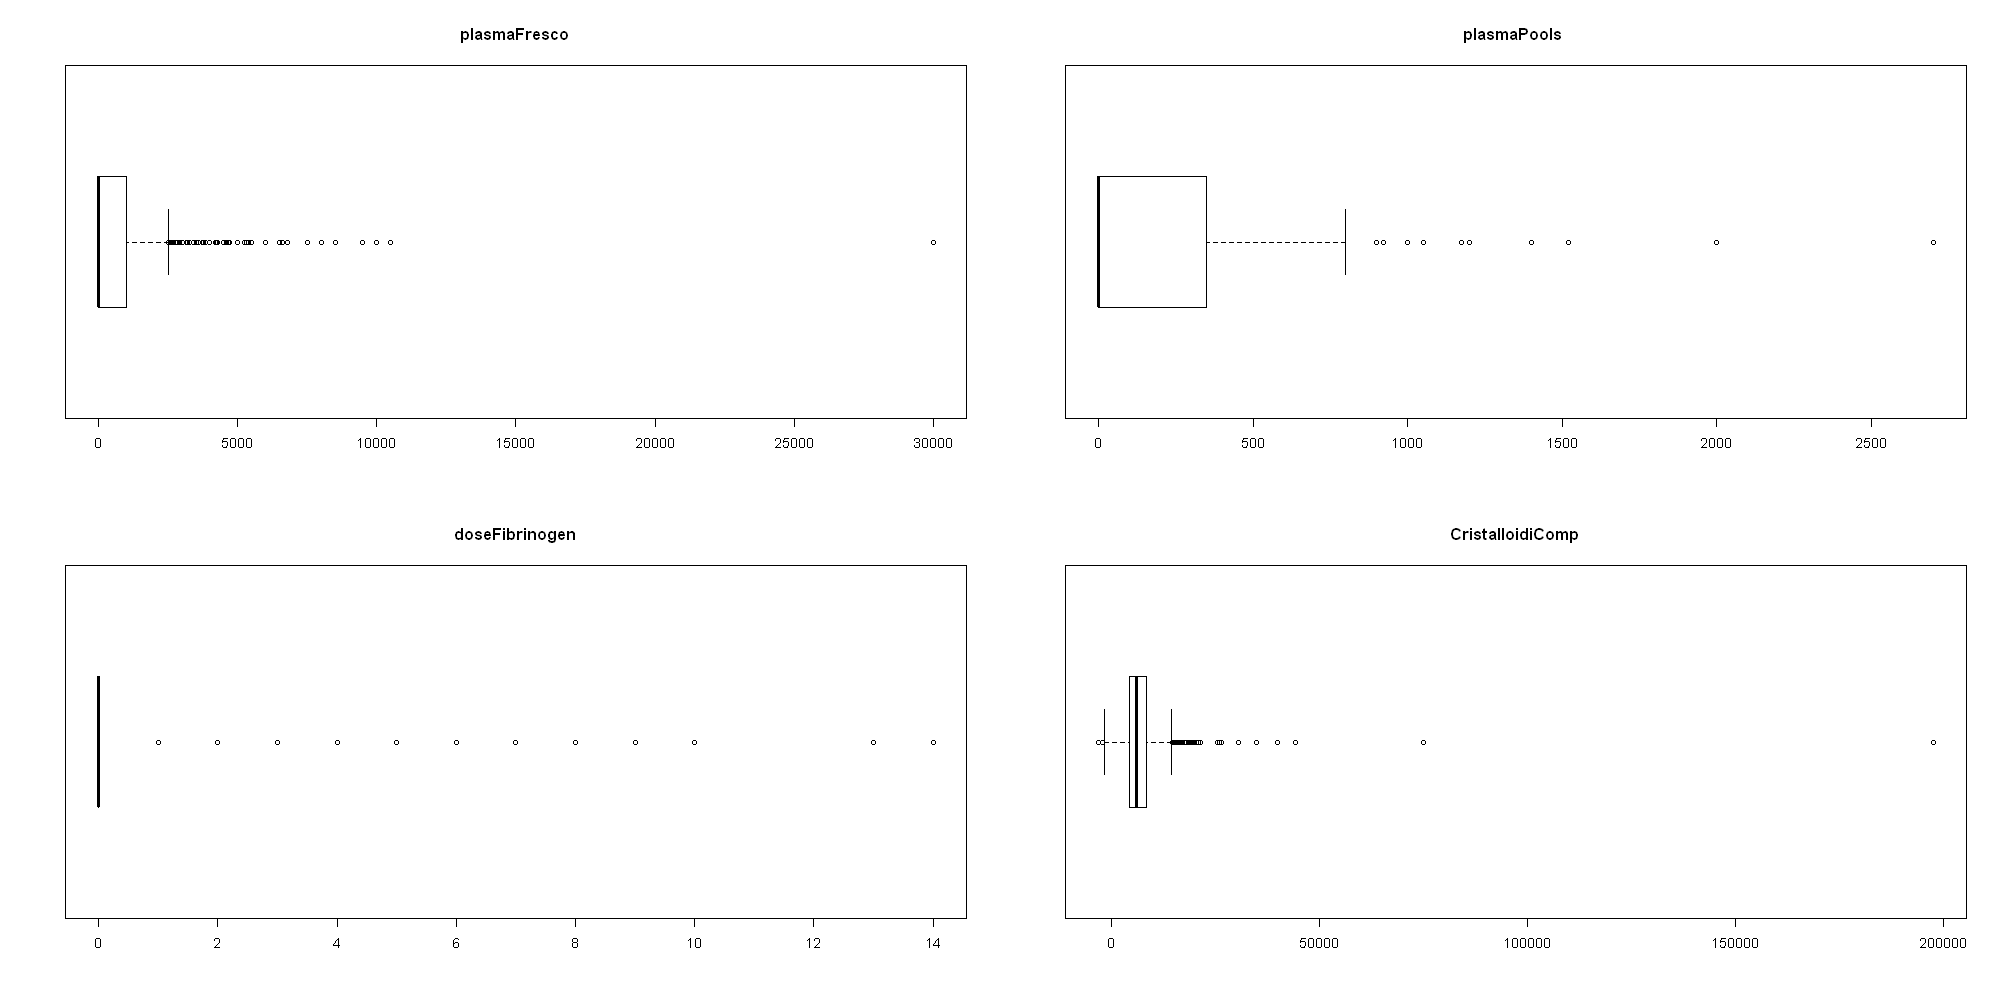

In [669]:
par(mfrow=c(2,2))

boxplot(df$plasmaFresco,horizontal = T,main="plasmaFresco")

boxplot(df$plasmaPools,horizontal = T,main="plasmaPools ")

boxplot(df$doseFibrinogen,horizontal = T,main="doseFibrinogen")

boxplot(df$CristalloidiComp,horizontal = T, main="CristalloidiComp")

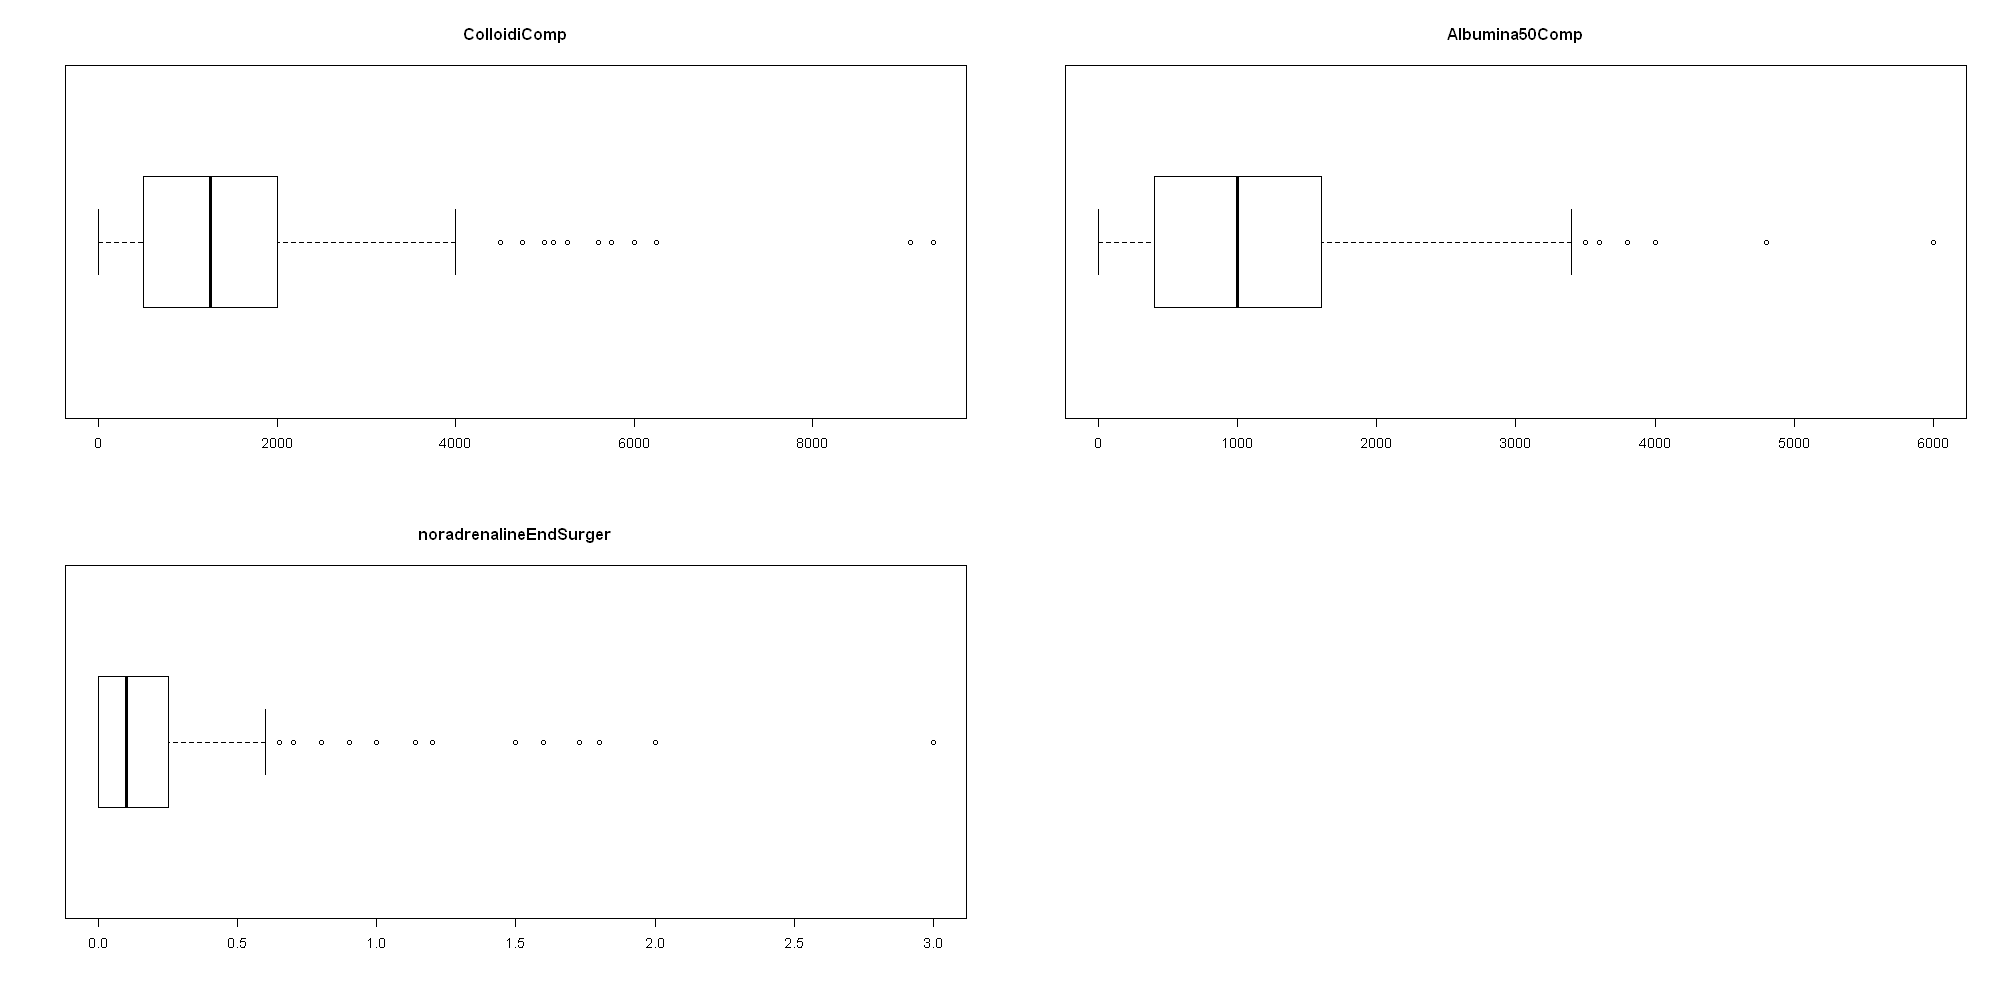

In [670]:
par(mfrow=c(2,2))

boxplot(df$ColloidiComp,horizontal = T,main="ColloidiComp")

boxplot(df$Albumina50Comp,horizontal = T,main="Albumina50Comp")


boxplot(df$noradrenalineEndSurger,horizontal = T, main="noradrenalineEndSurger")

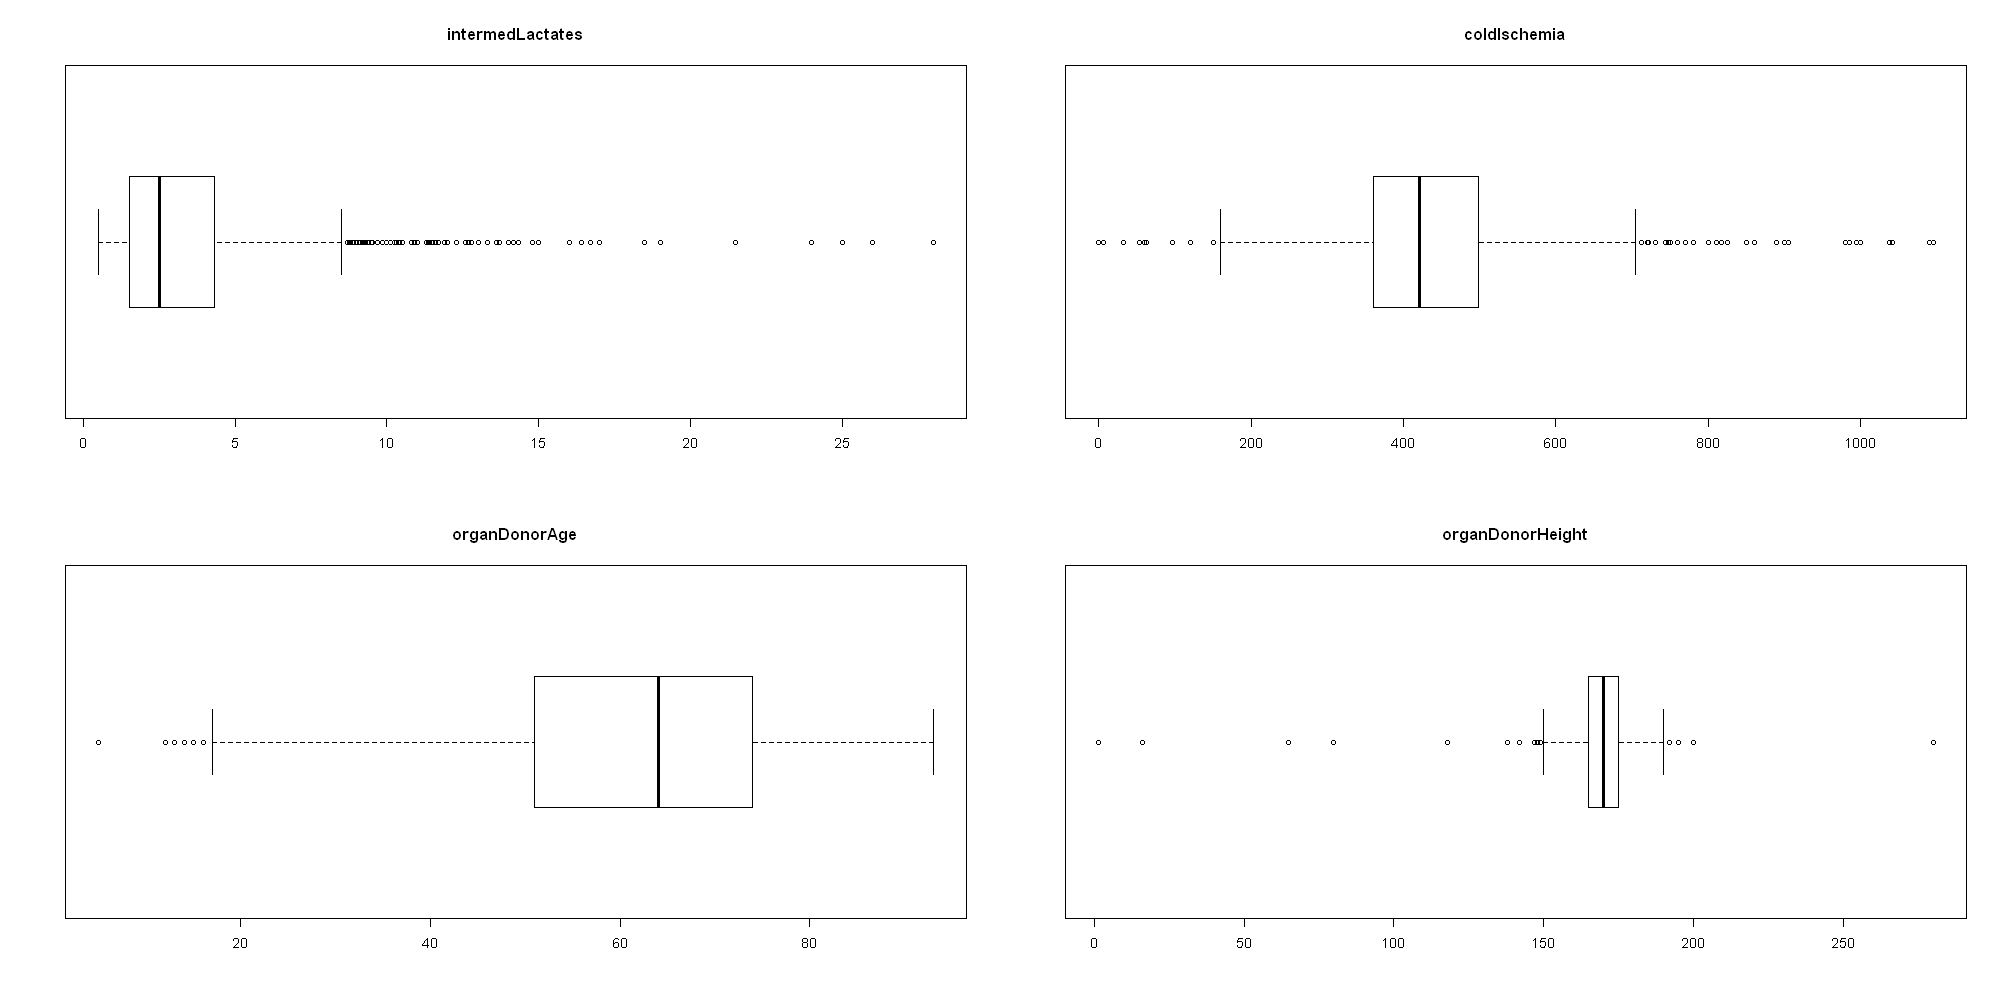

In [671]:
par(mfrow=c(2,2))

boxplot(df$intermedLactates,horizontal = T,main="intermedLactates")

boxplot(df$coldIschemia,horizontal = T,main="coldIschemia")

boxplot(df$organDonorAge,horizontal = T,main="organDonorAge")

boxplot(df$organDonorHeight,horizontal = T, main="organDonorHeight")

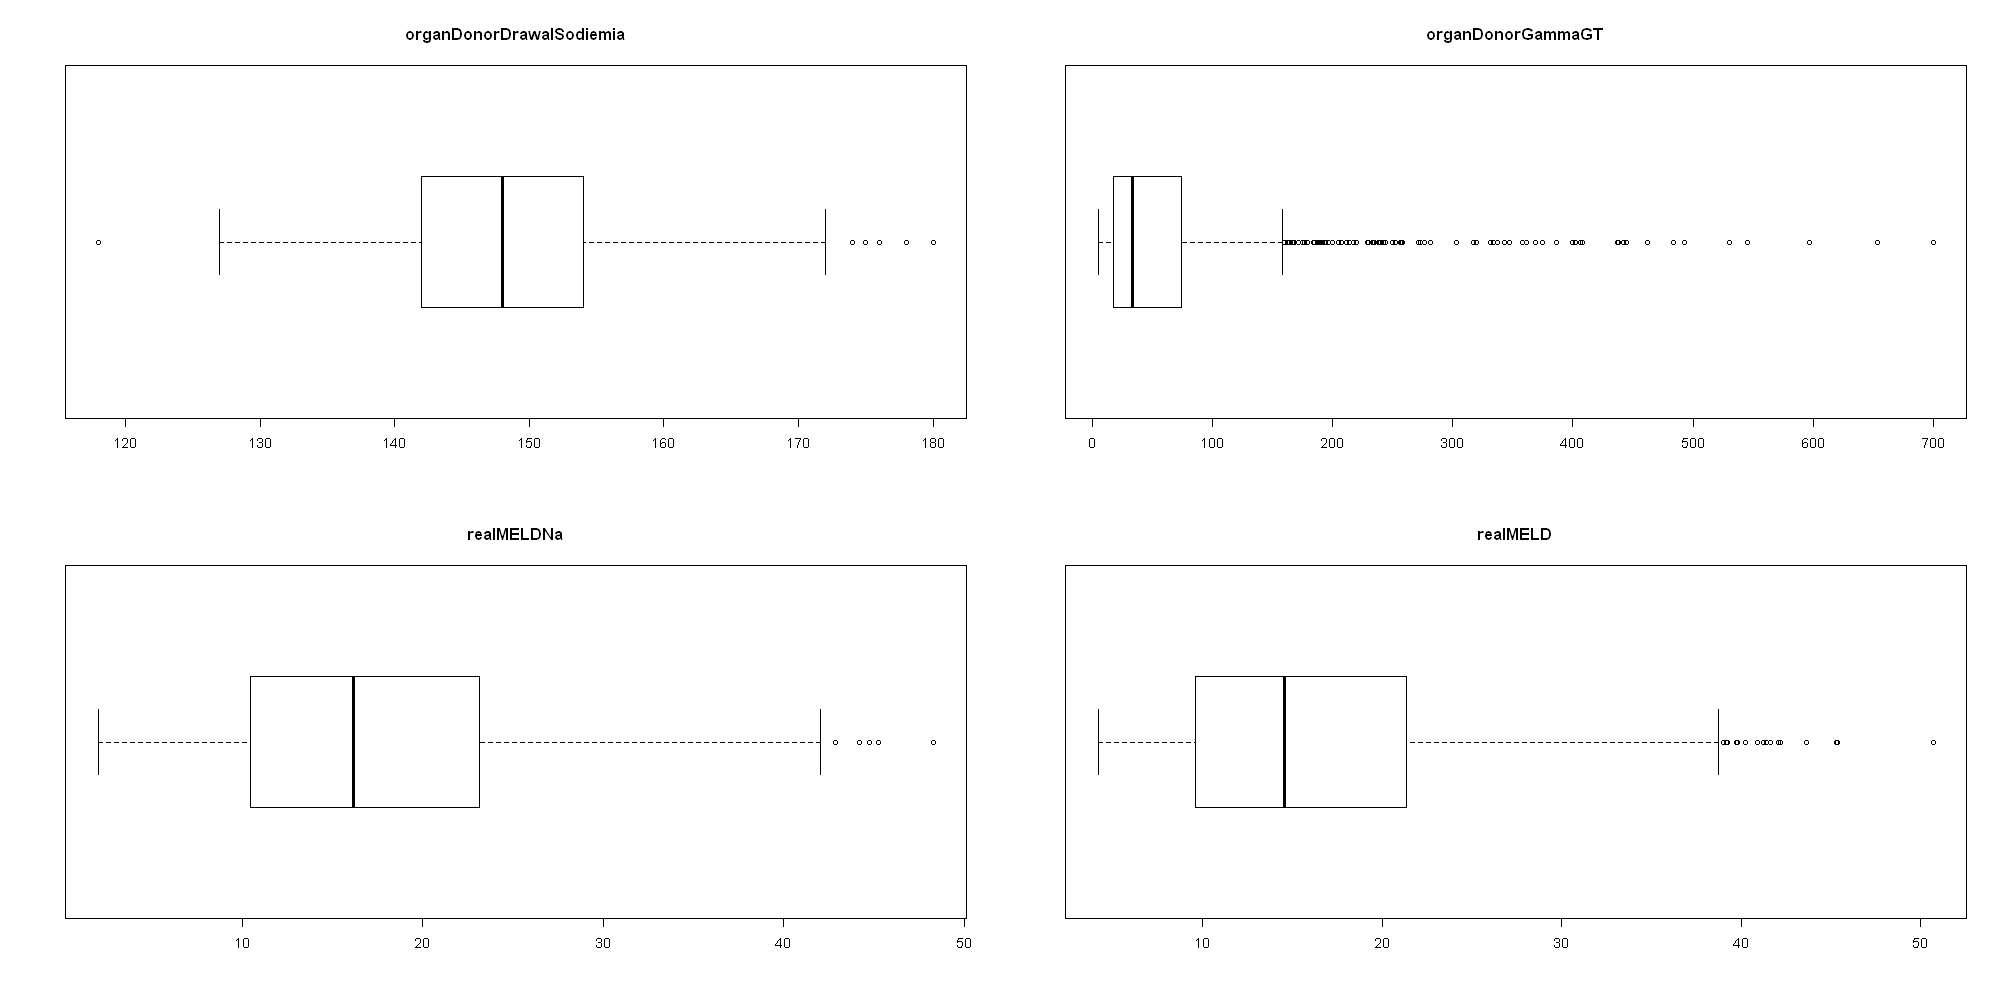

In [672]:
par(mfrow=c(2,2))

boxplot(df$organDonorDrawalSodiemia,horizontal = T,main="organDonorDrawalSodiemia")

boxplot(df$organDonorGammaGT,horizontal = T,main="organDonorGammaGT")

boxplot(df$realMELDNa,horizontal = T,main="realMELDNa")

boxplot(df$realMELD, horizontal = T,main="realMELD")

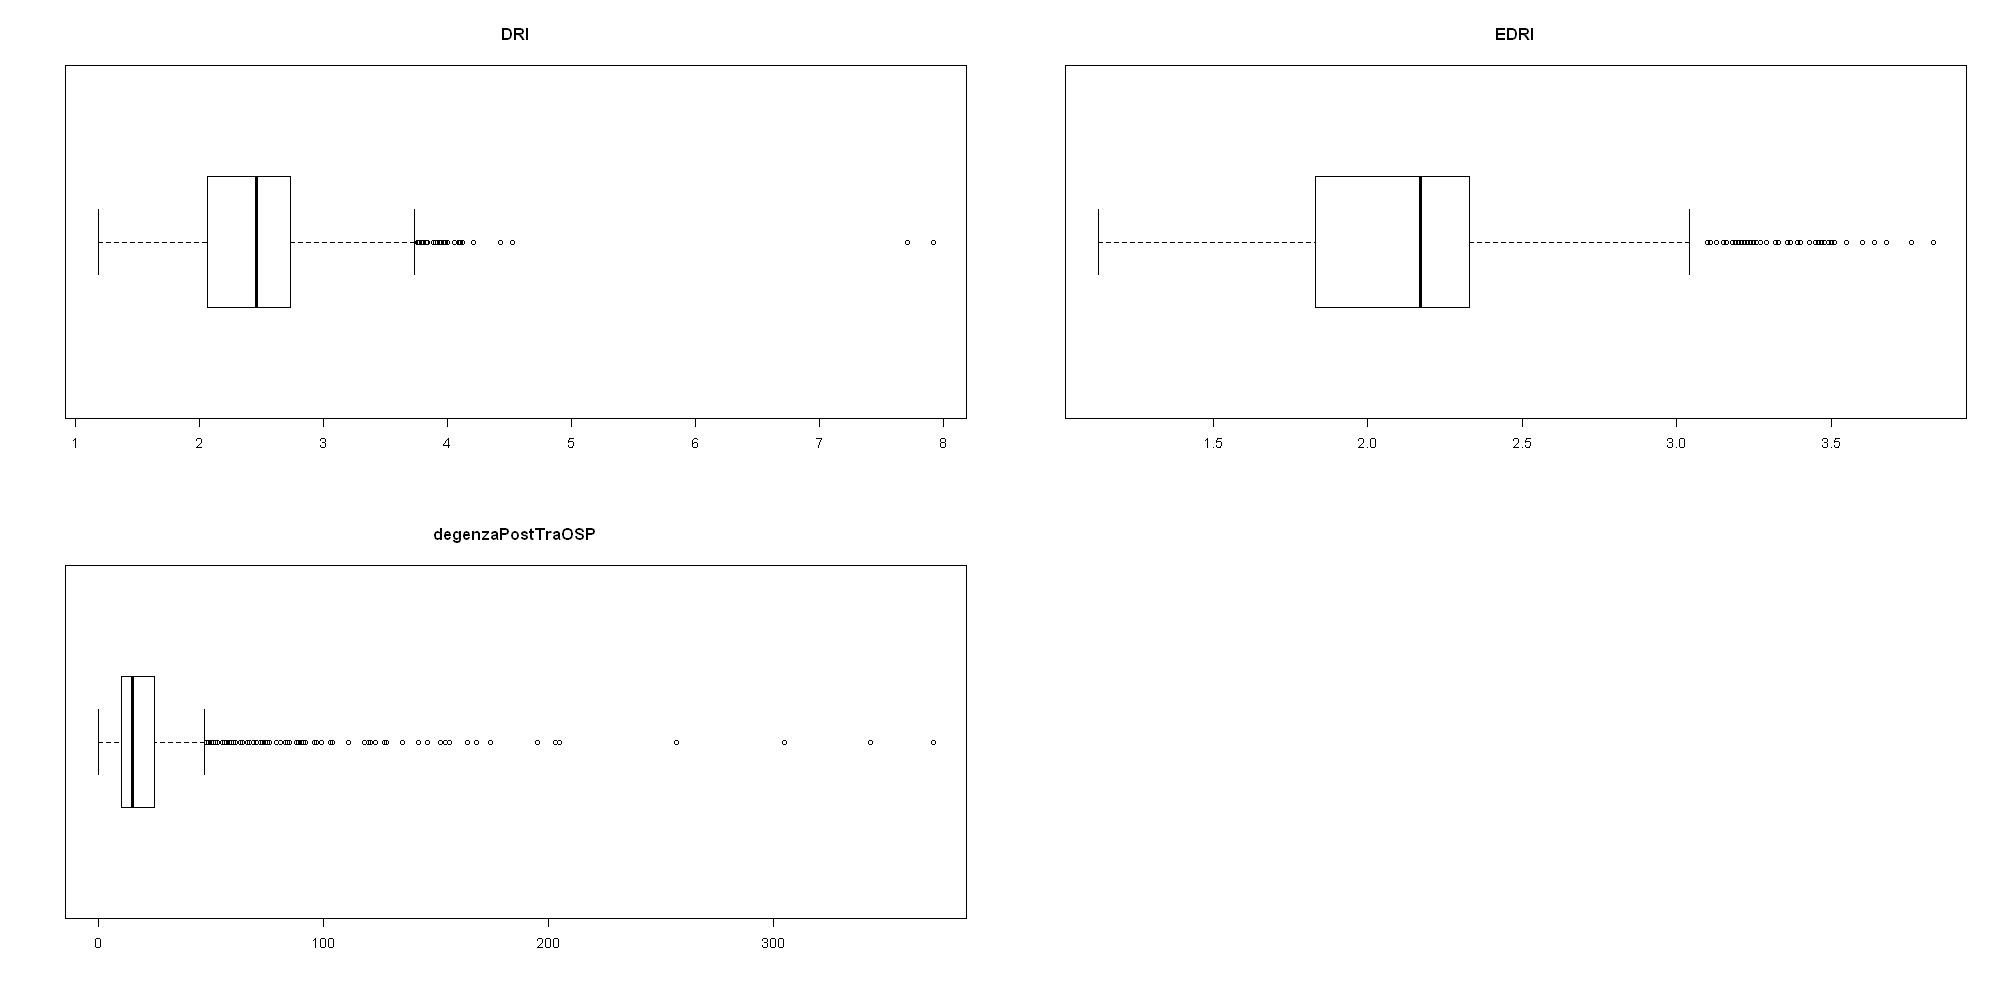

In [673]:
par(mfrow=c(2,2))

boxplot(df$DRI,horizontal = T,main="DRI")

boxplot(df$EDRI,horizontal = T,main="EDRI")

boxplot(df$degenzaPostTraOSP,horizontal = T,main="degenzaPostTraOSP")

3 columns ignored with more than 50 categories.
patientKey: 1178 categories
icuAdmDate__icuAdmDate: 736 categories
icuAdmDate__icuAdmTime: 449 categories




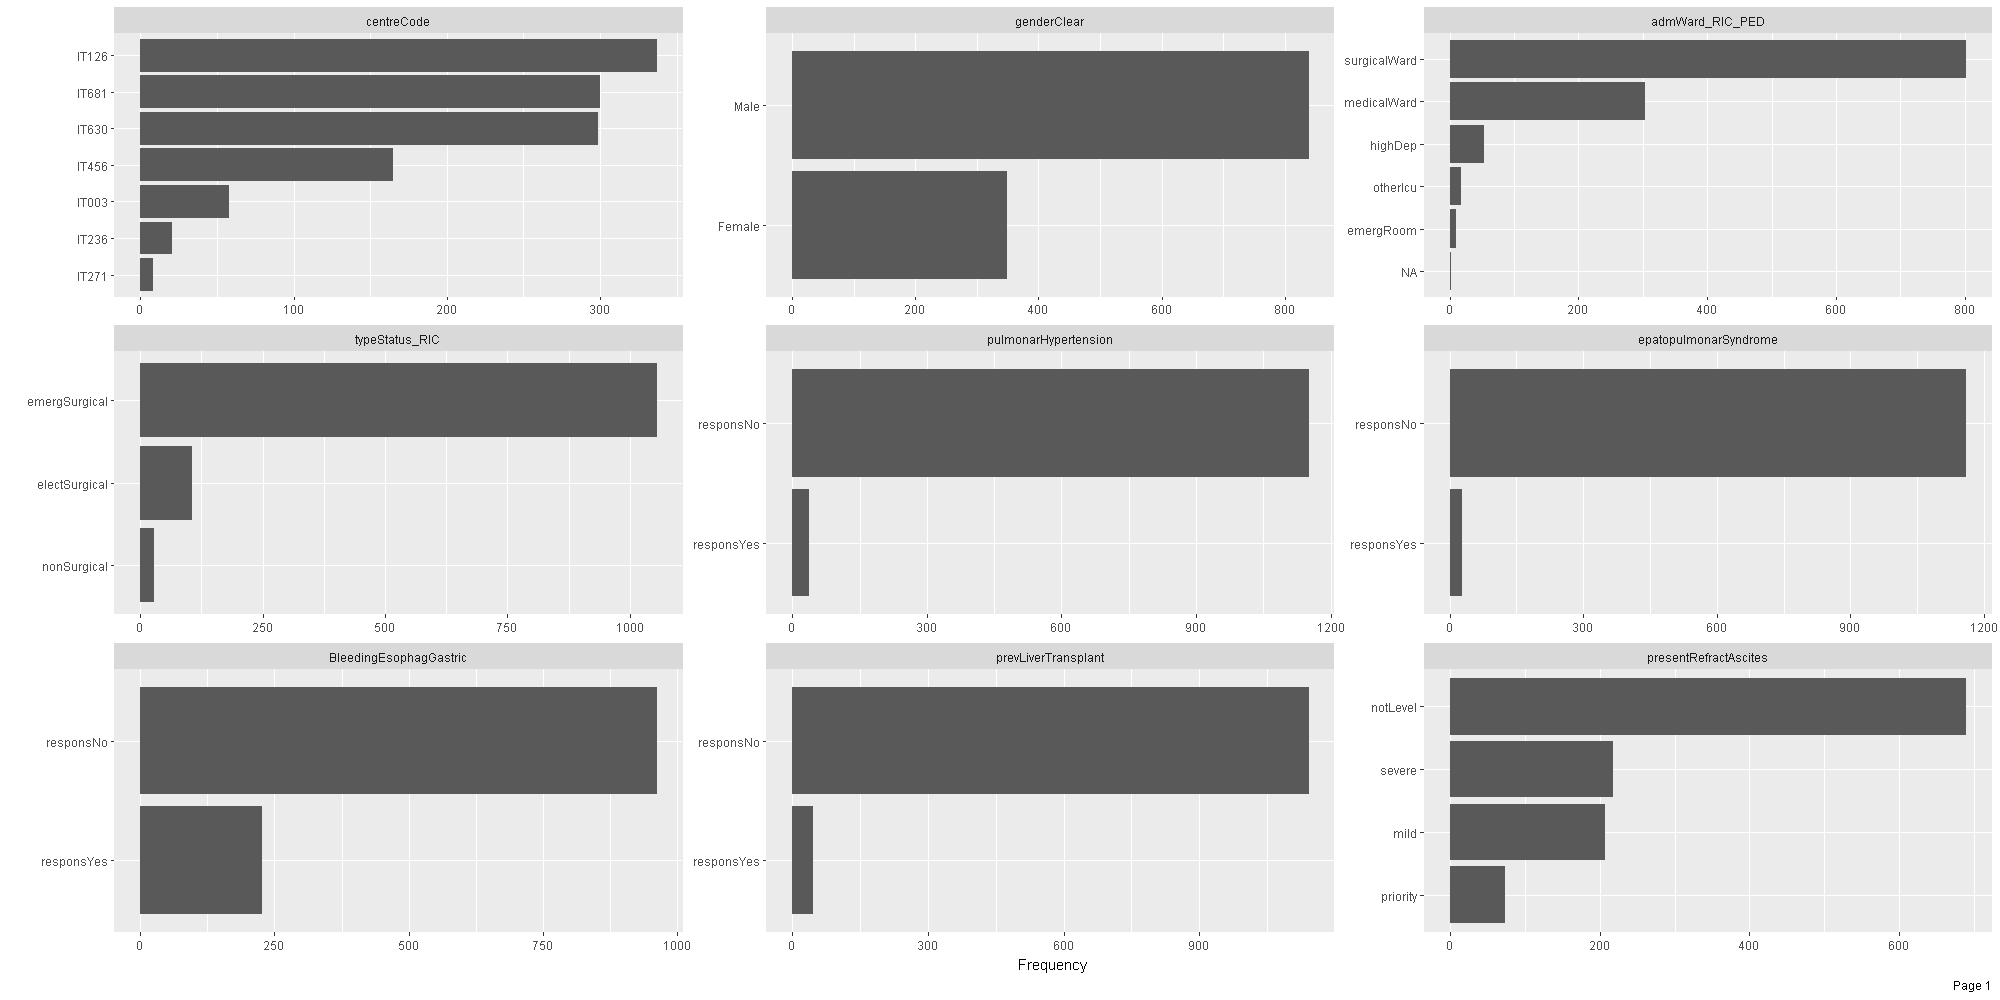

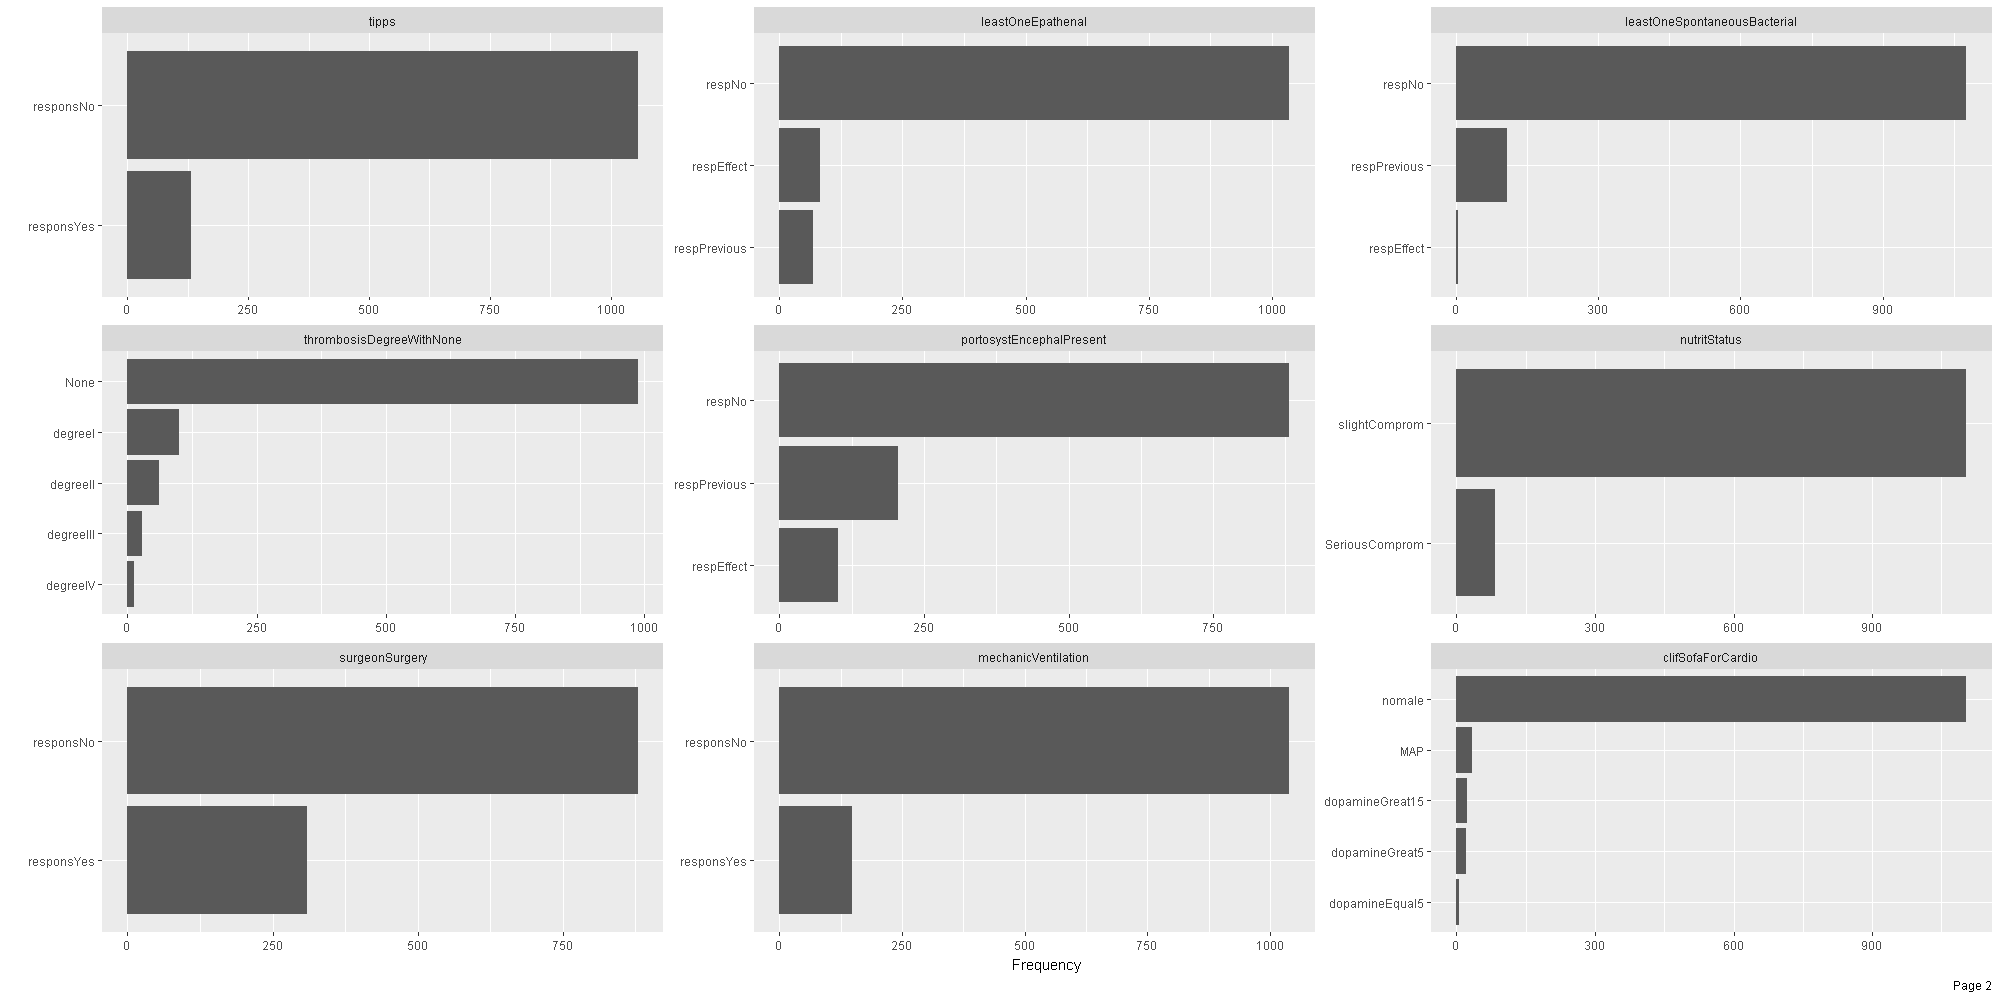

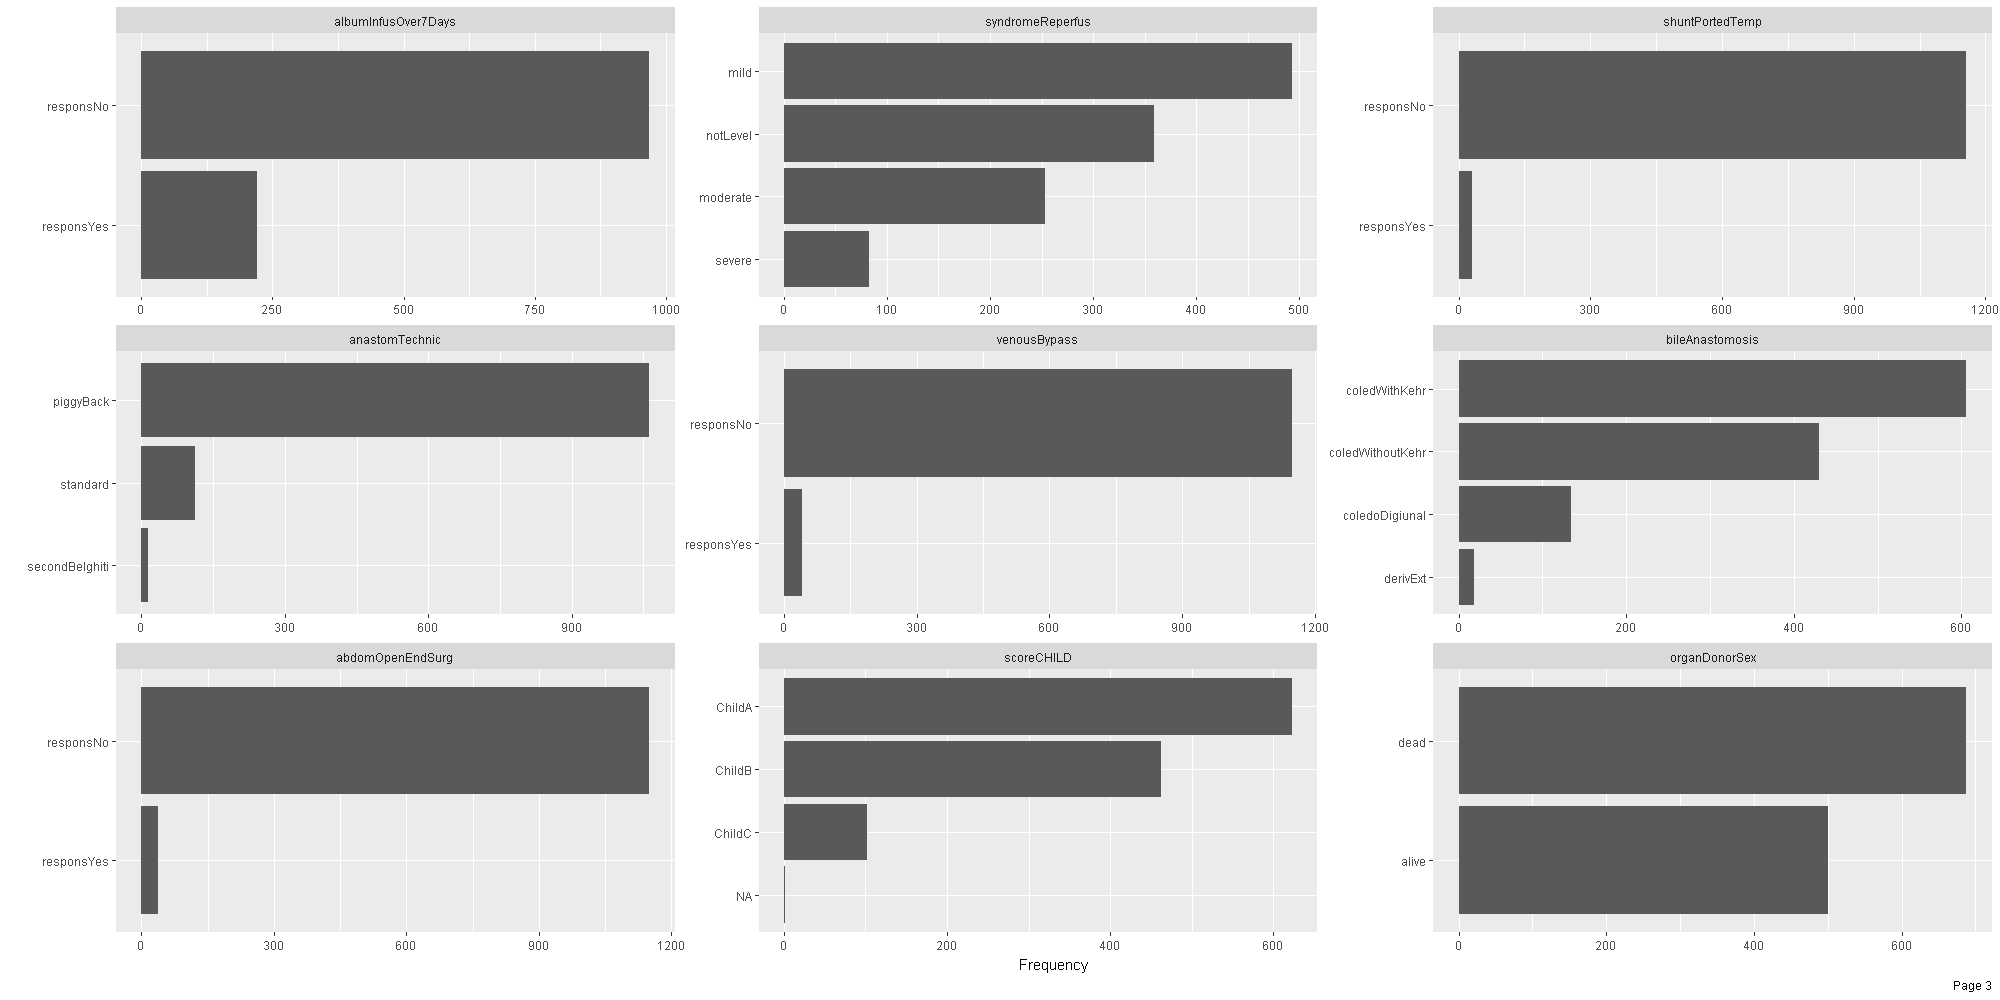

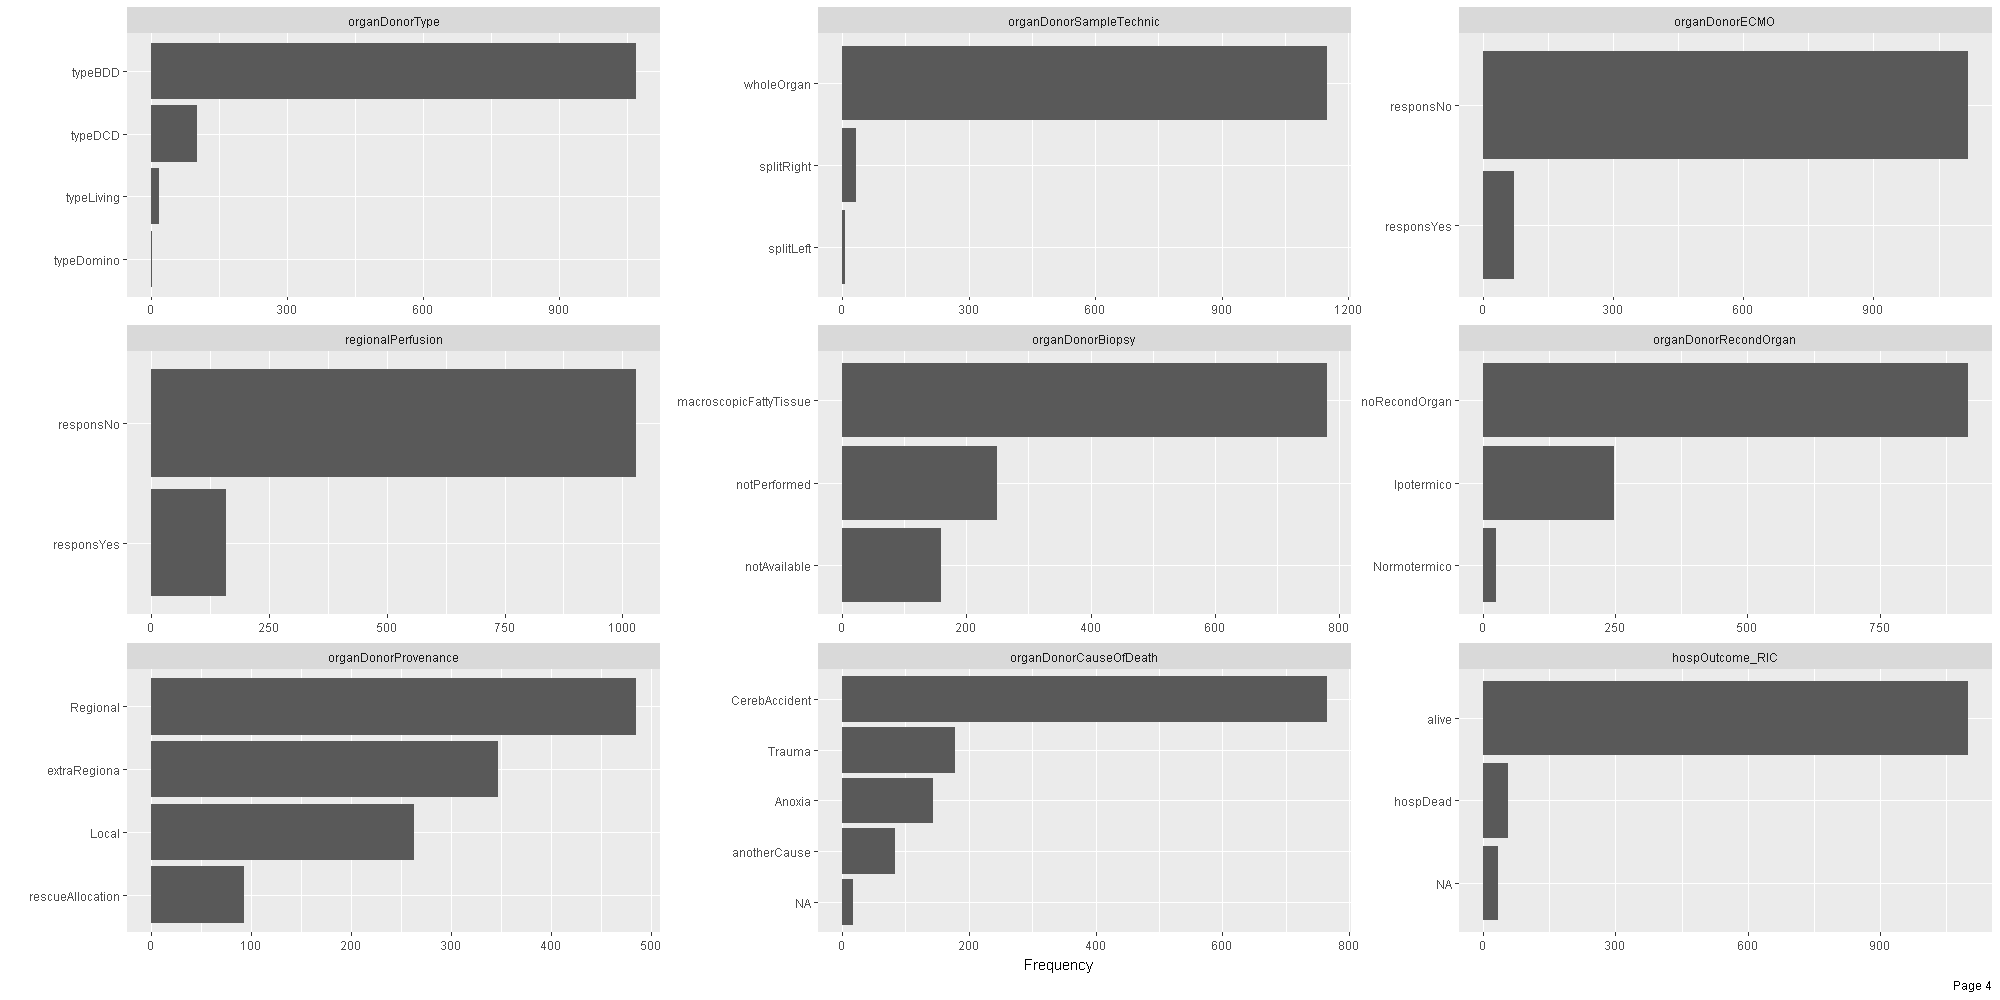

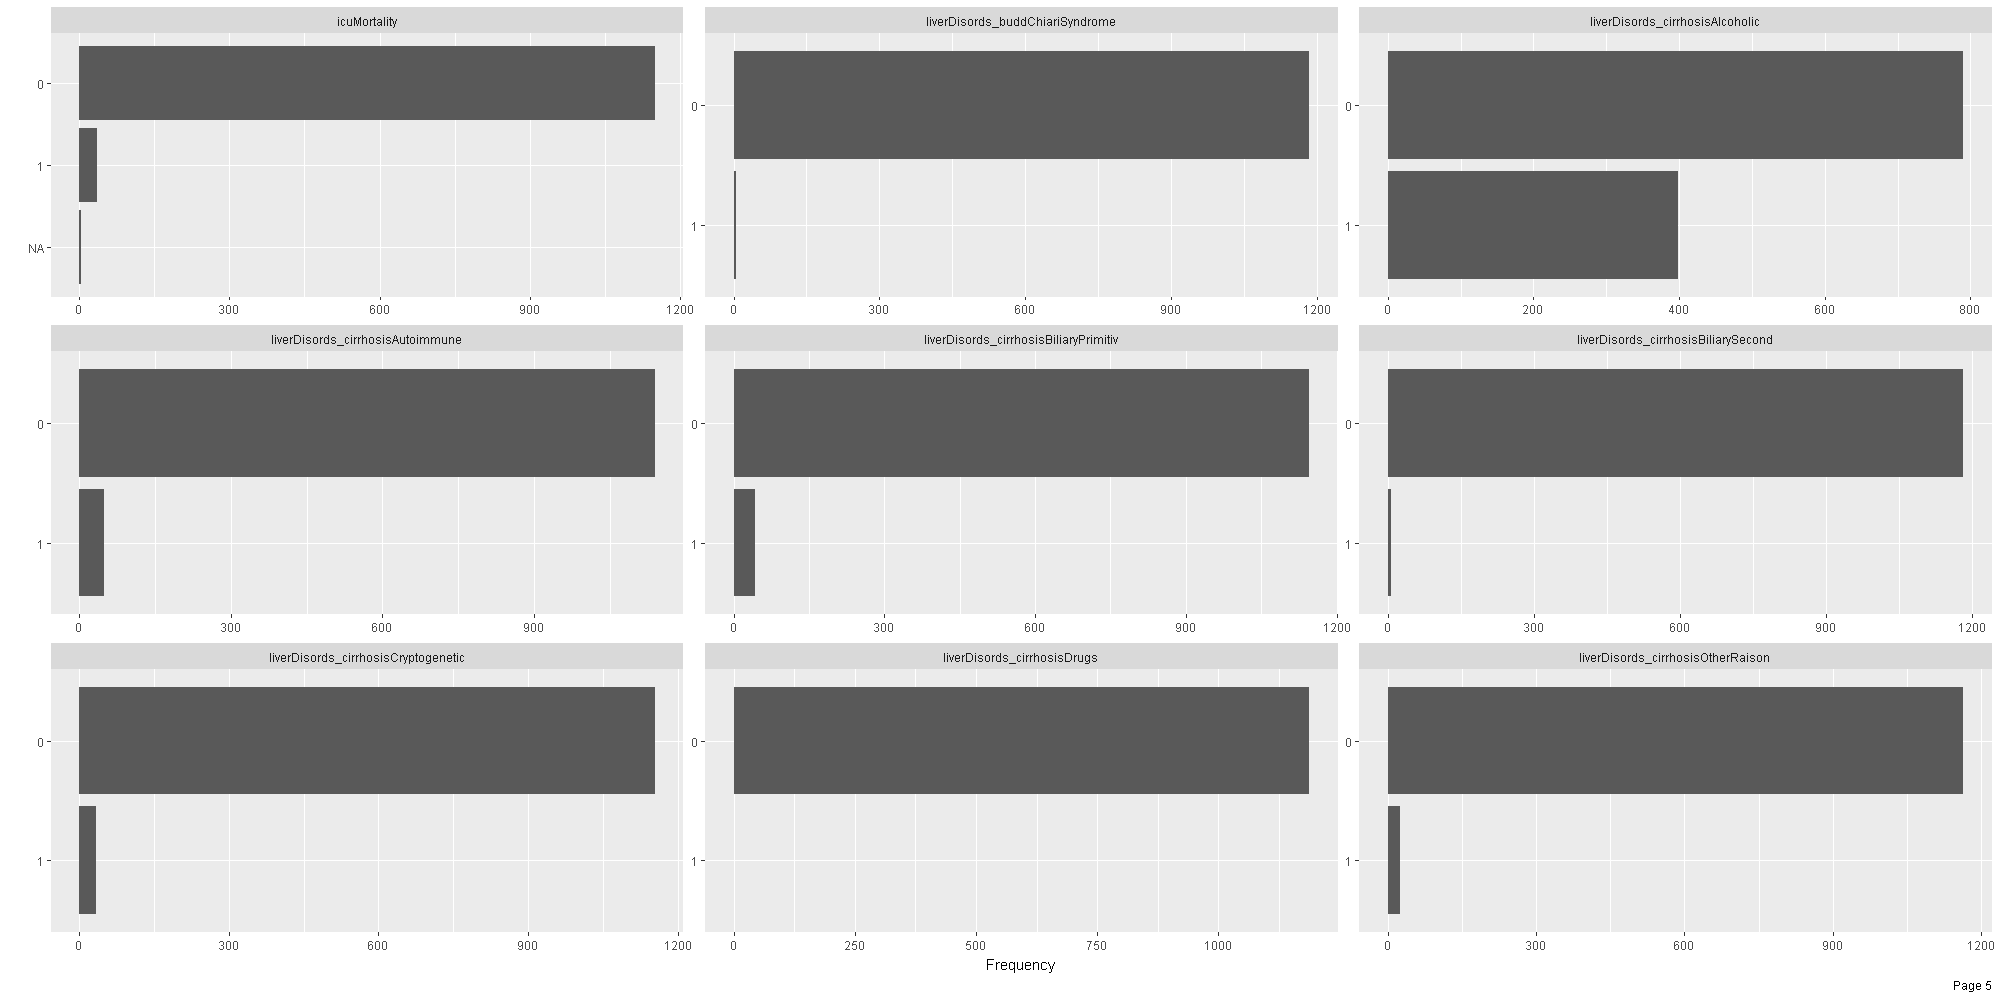

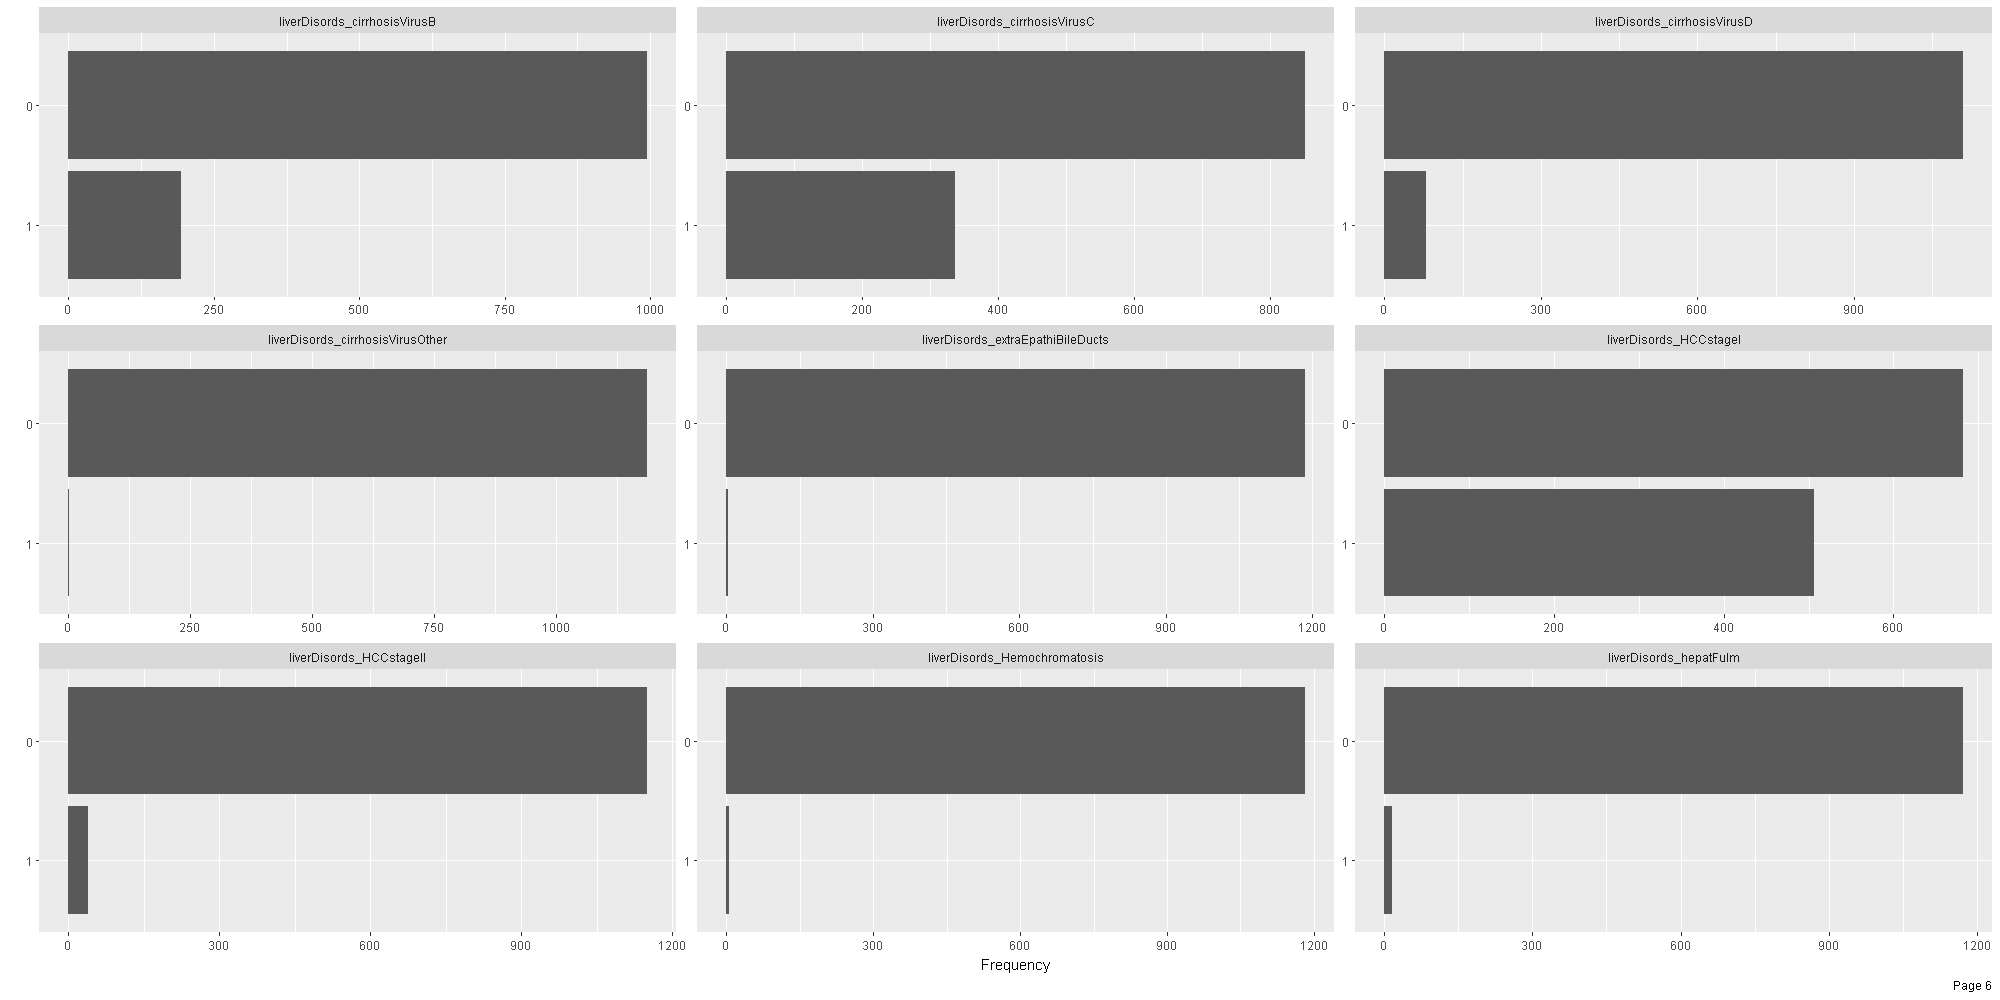

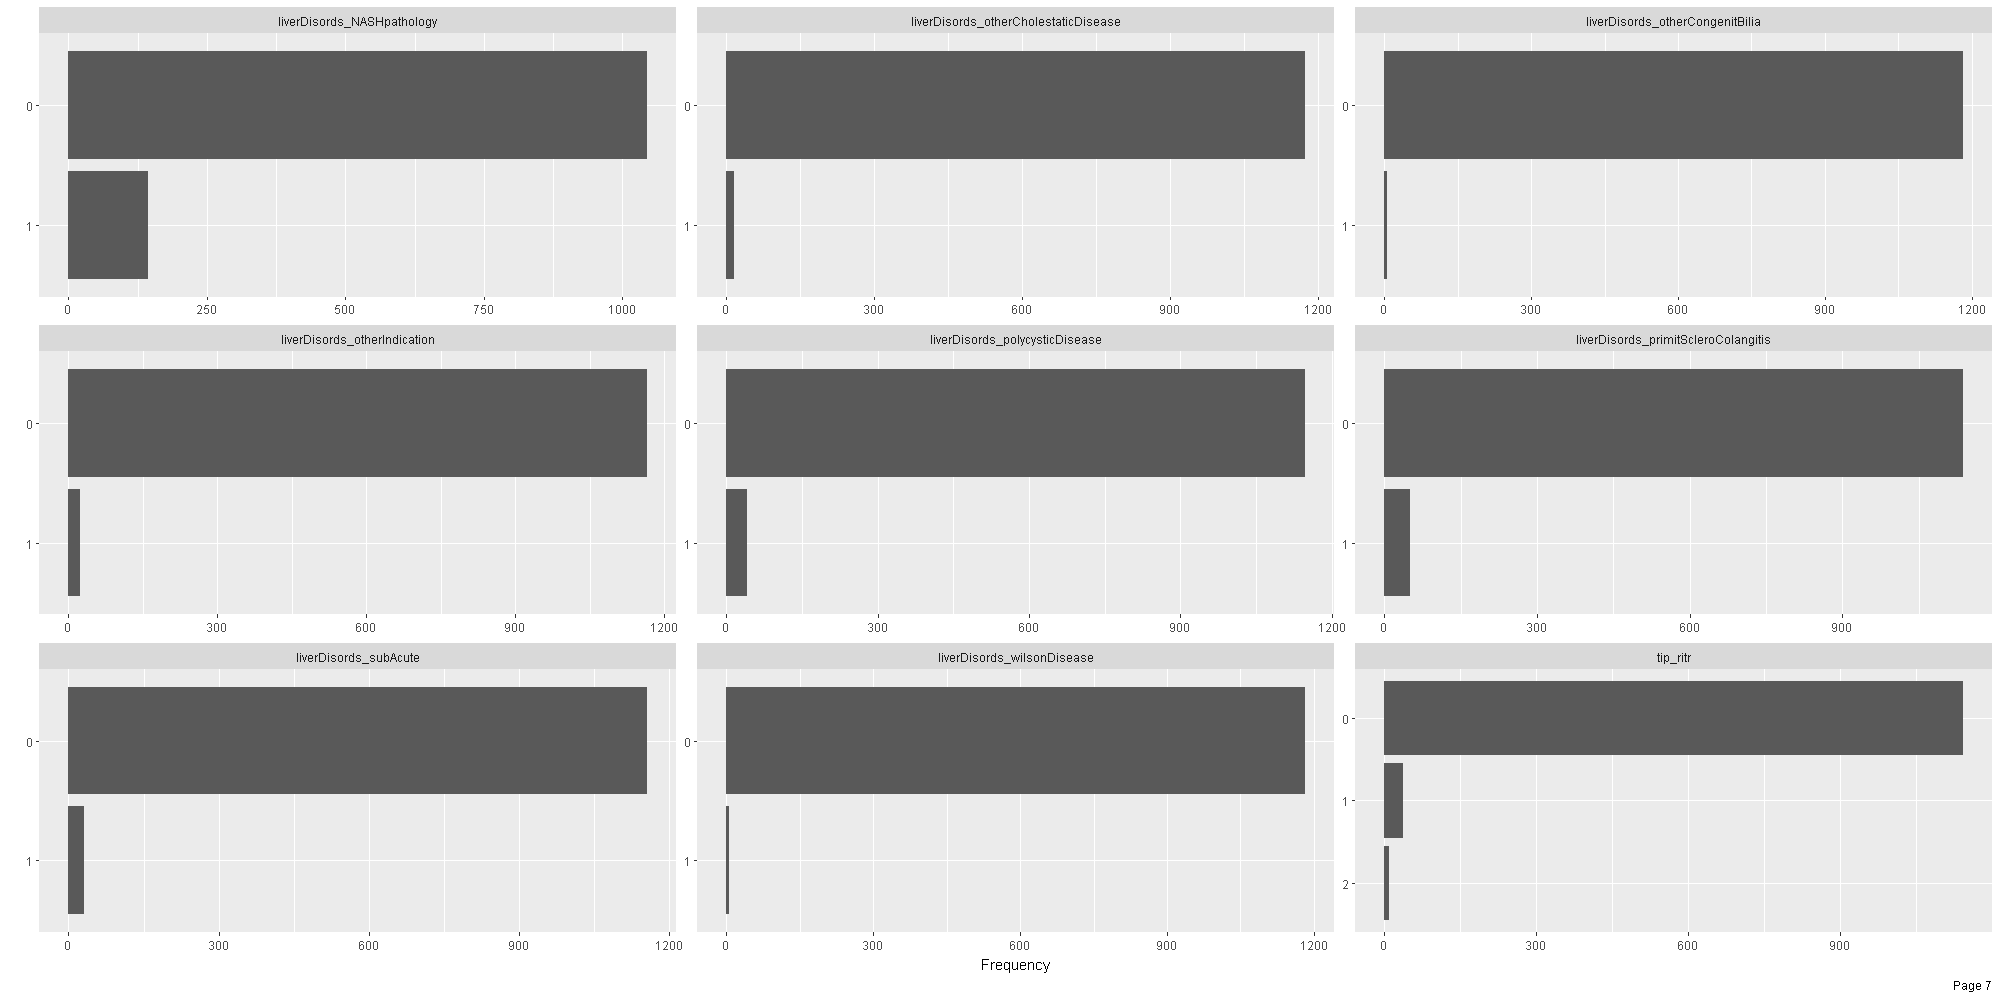

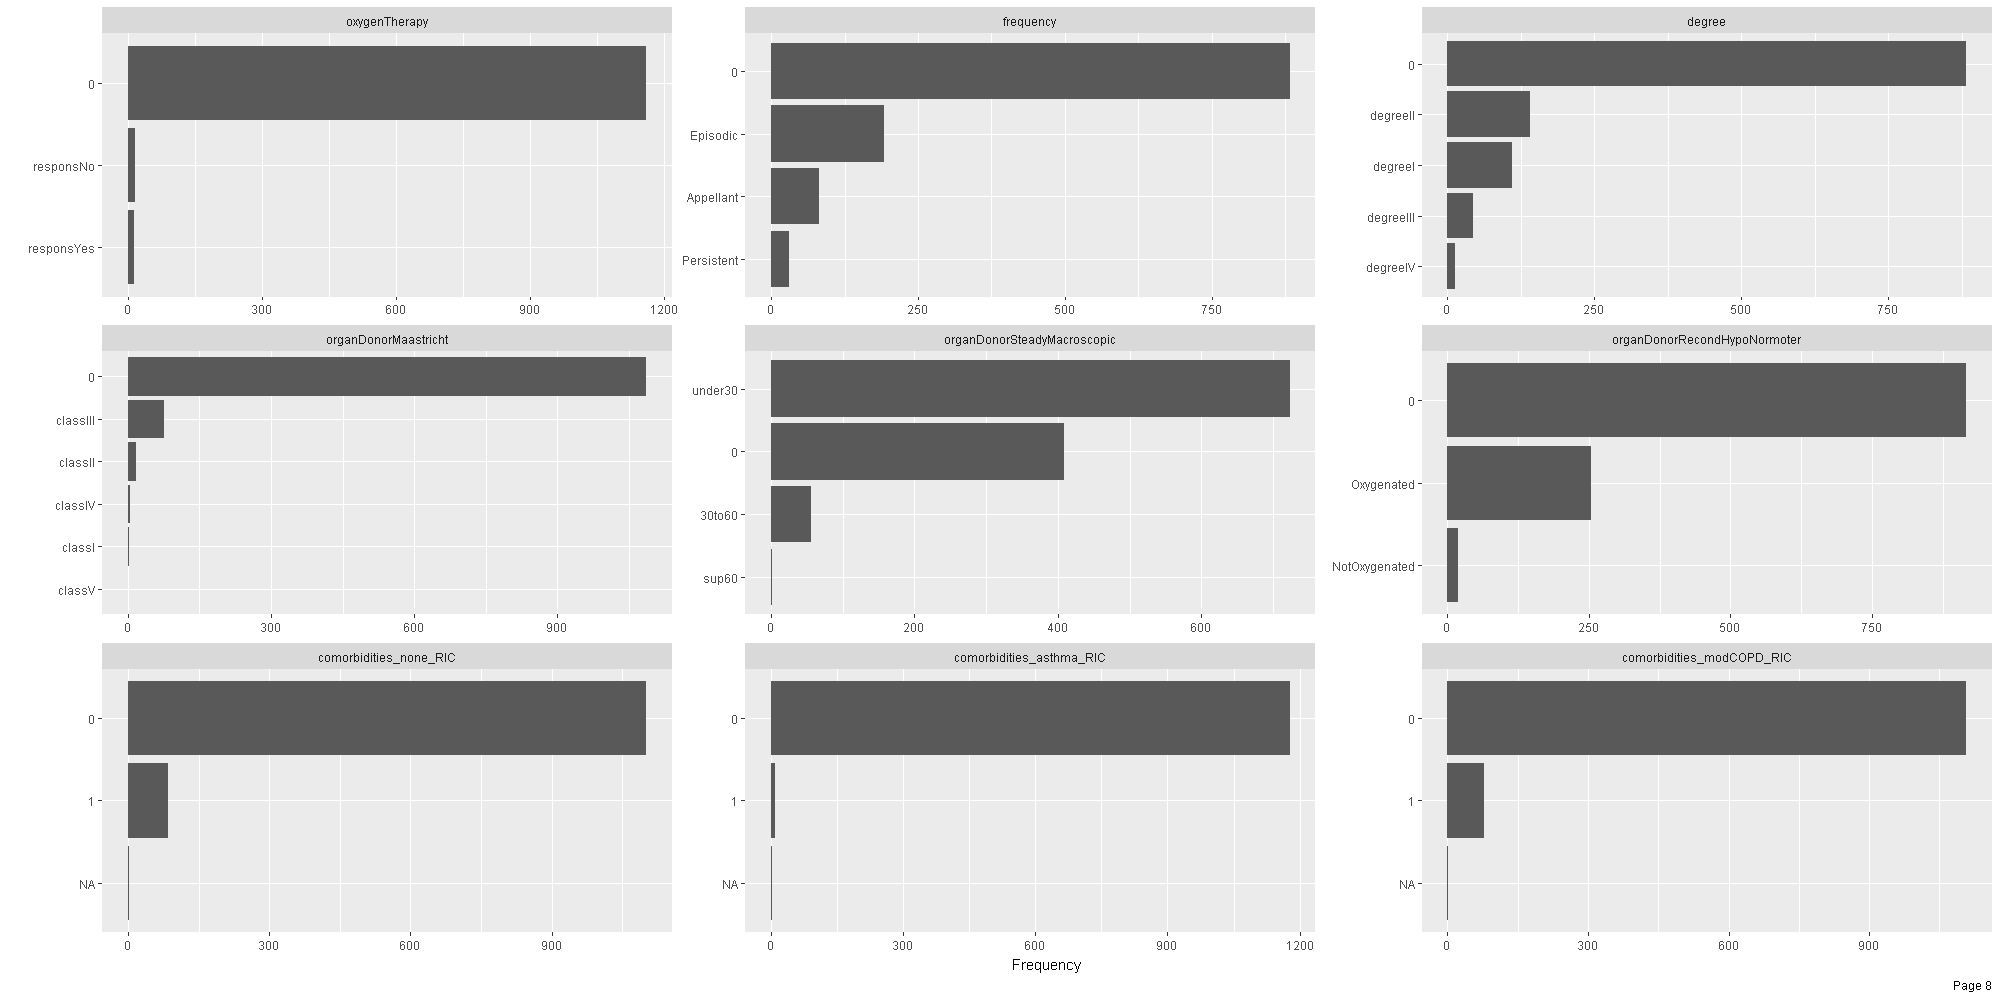

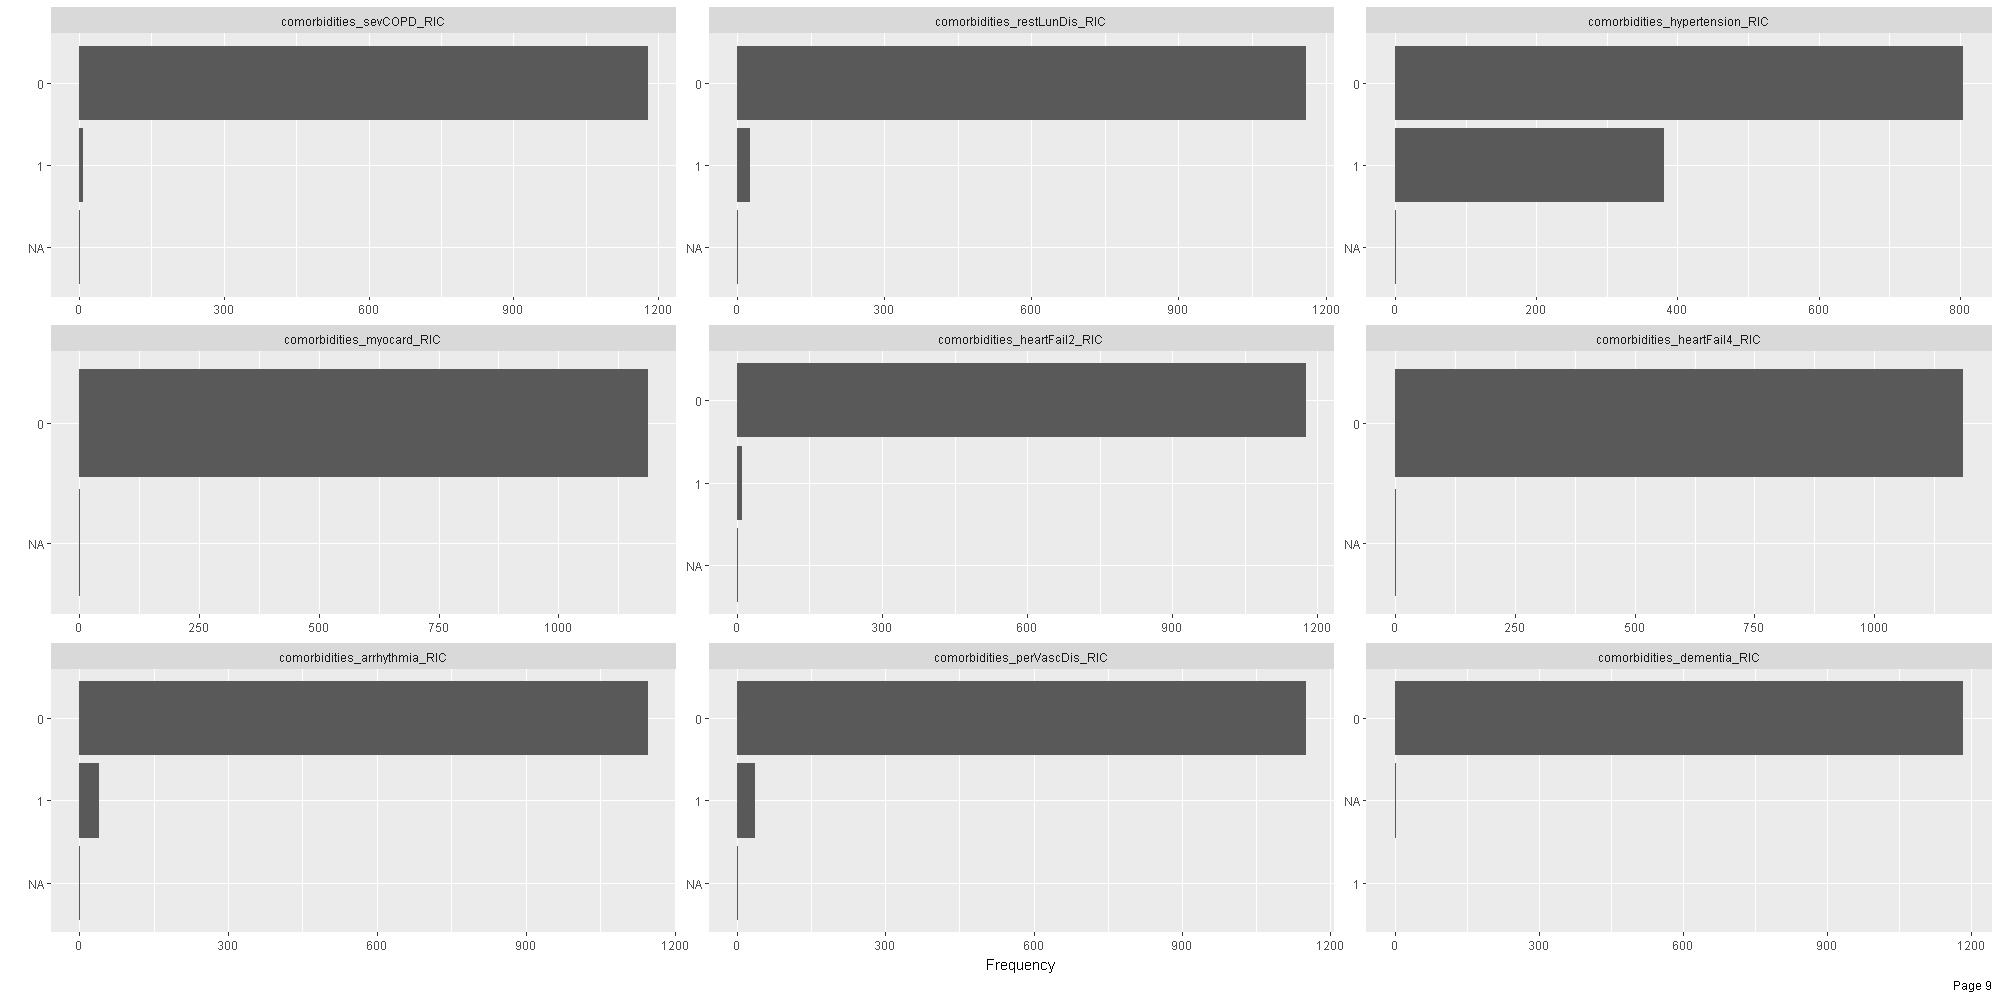

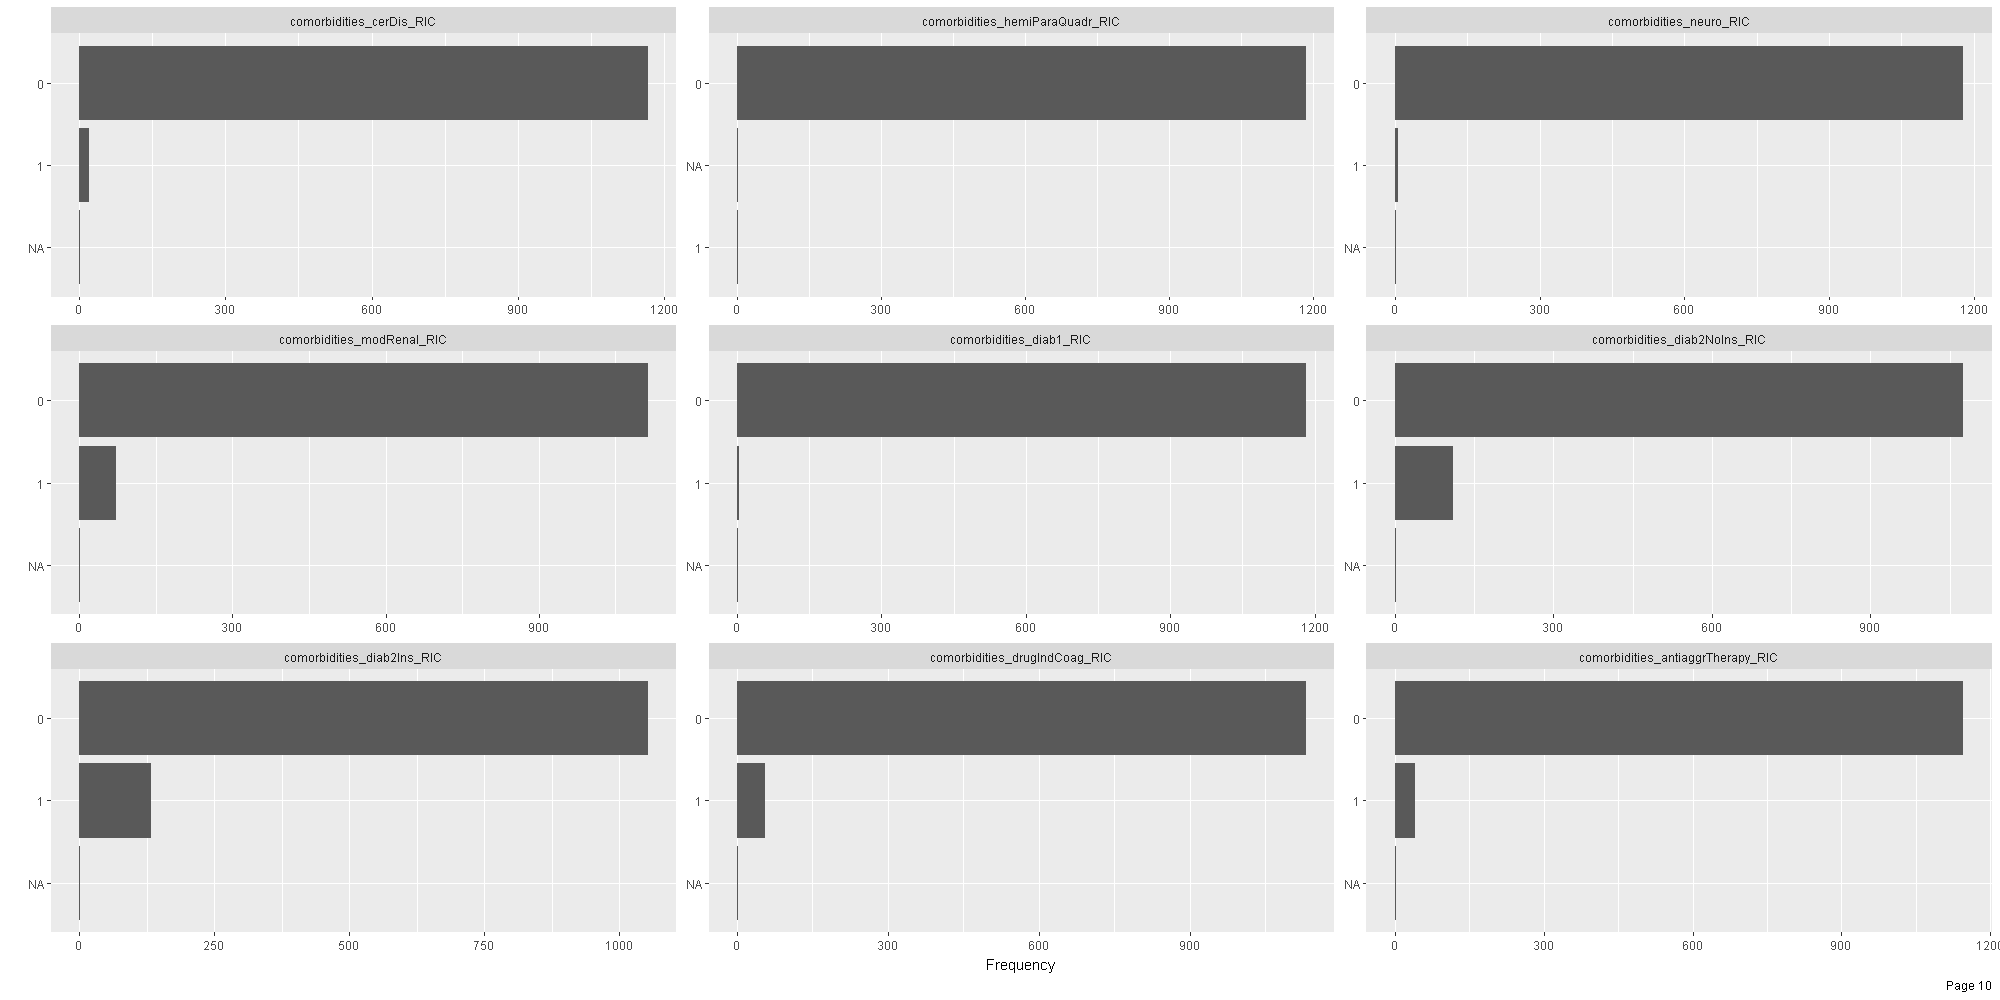

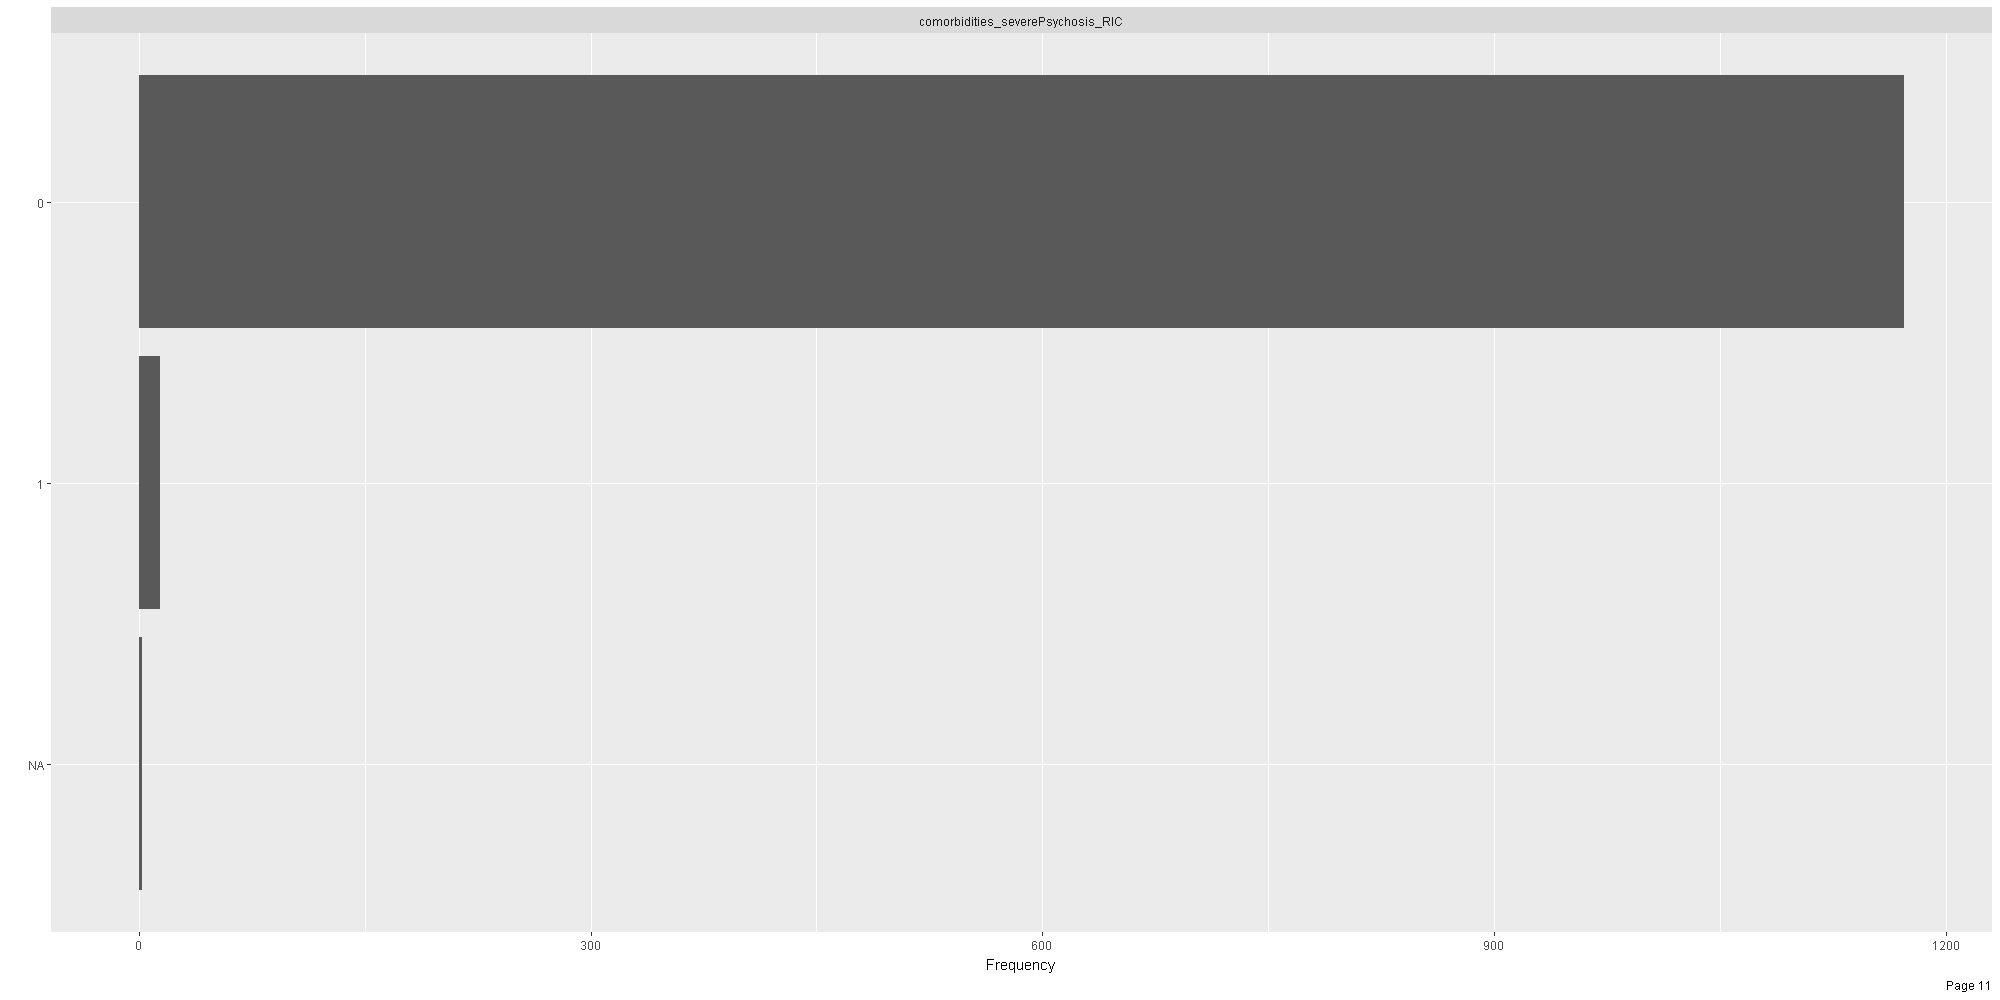

In [674]:
plot_bar(data = df)

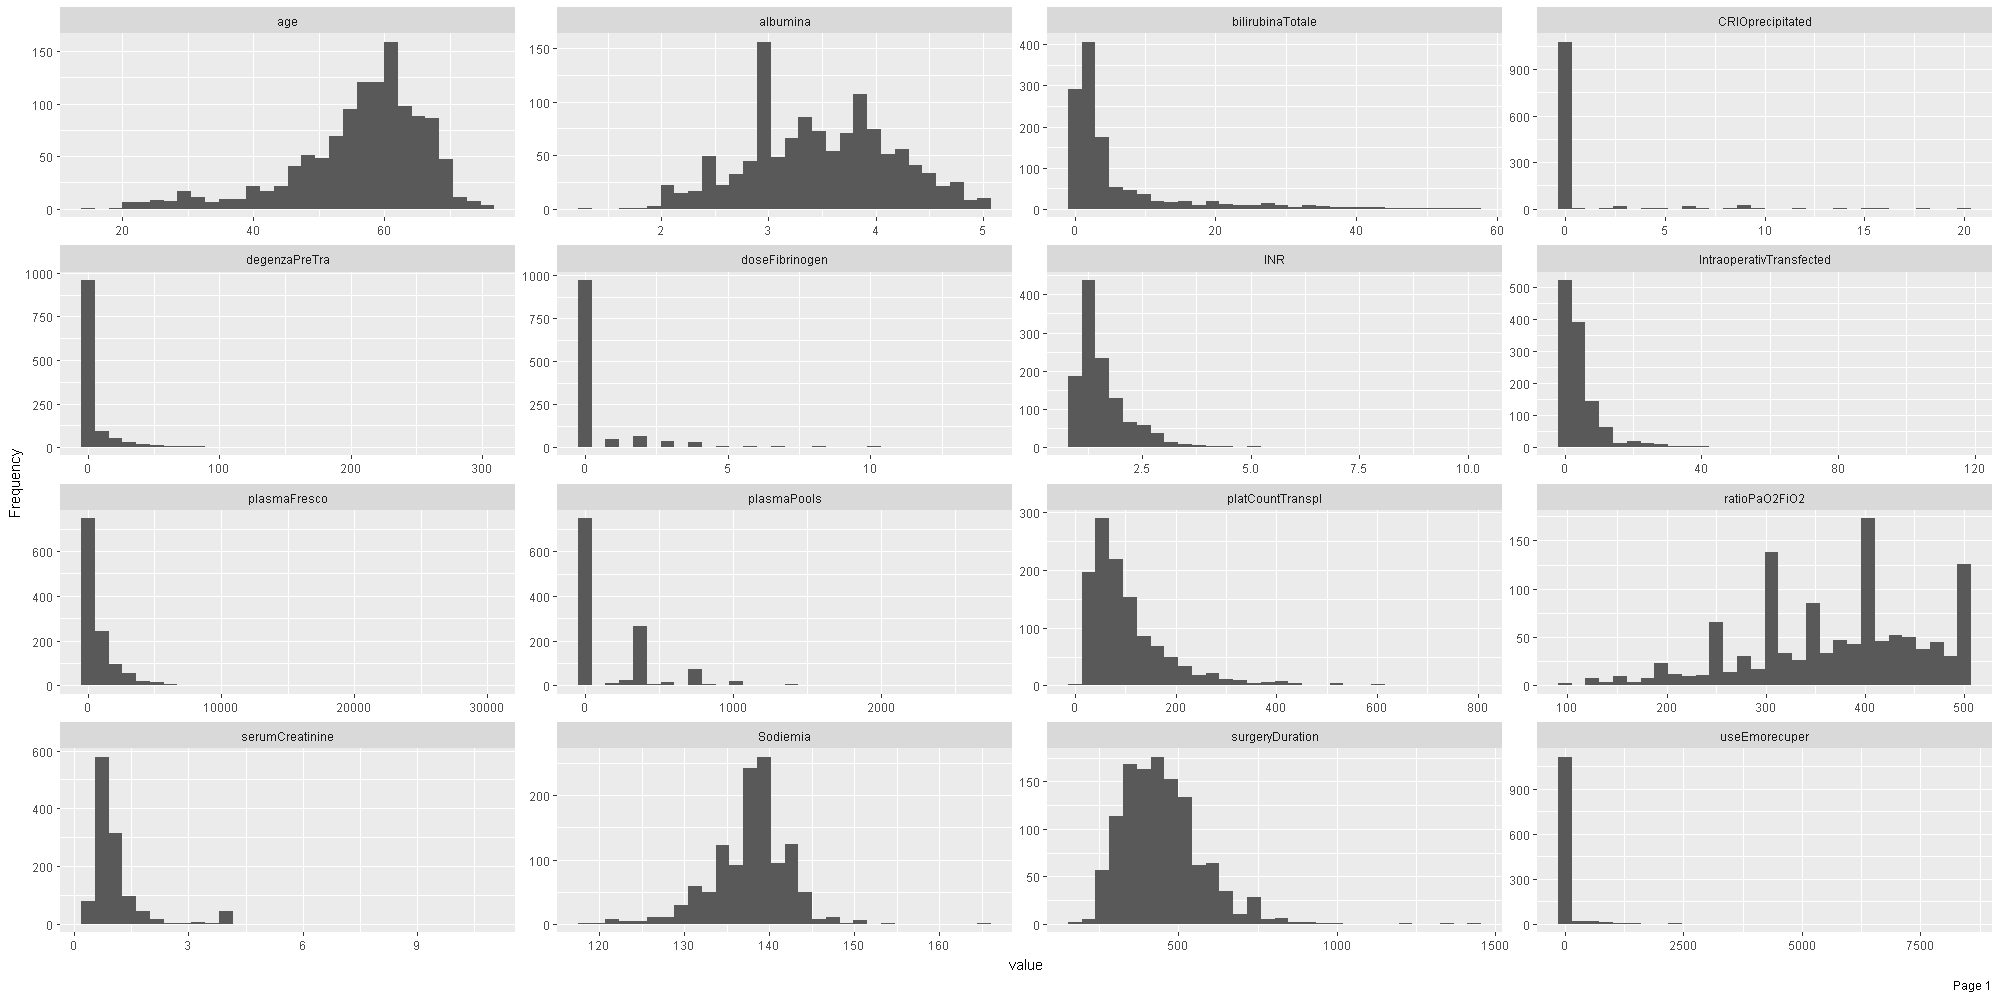

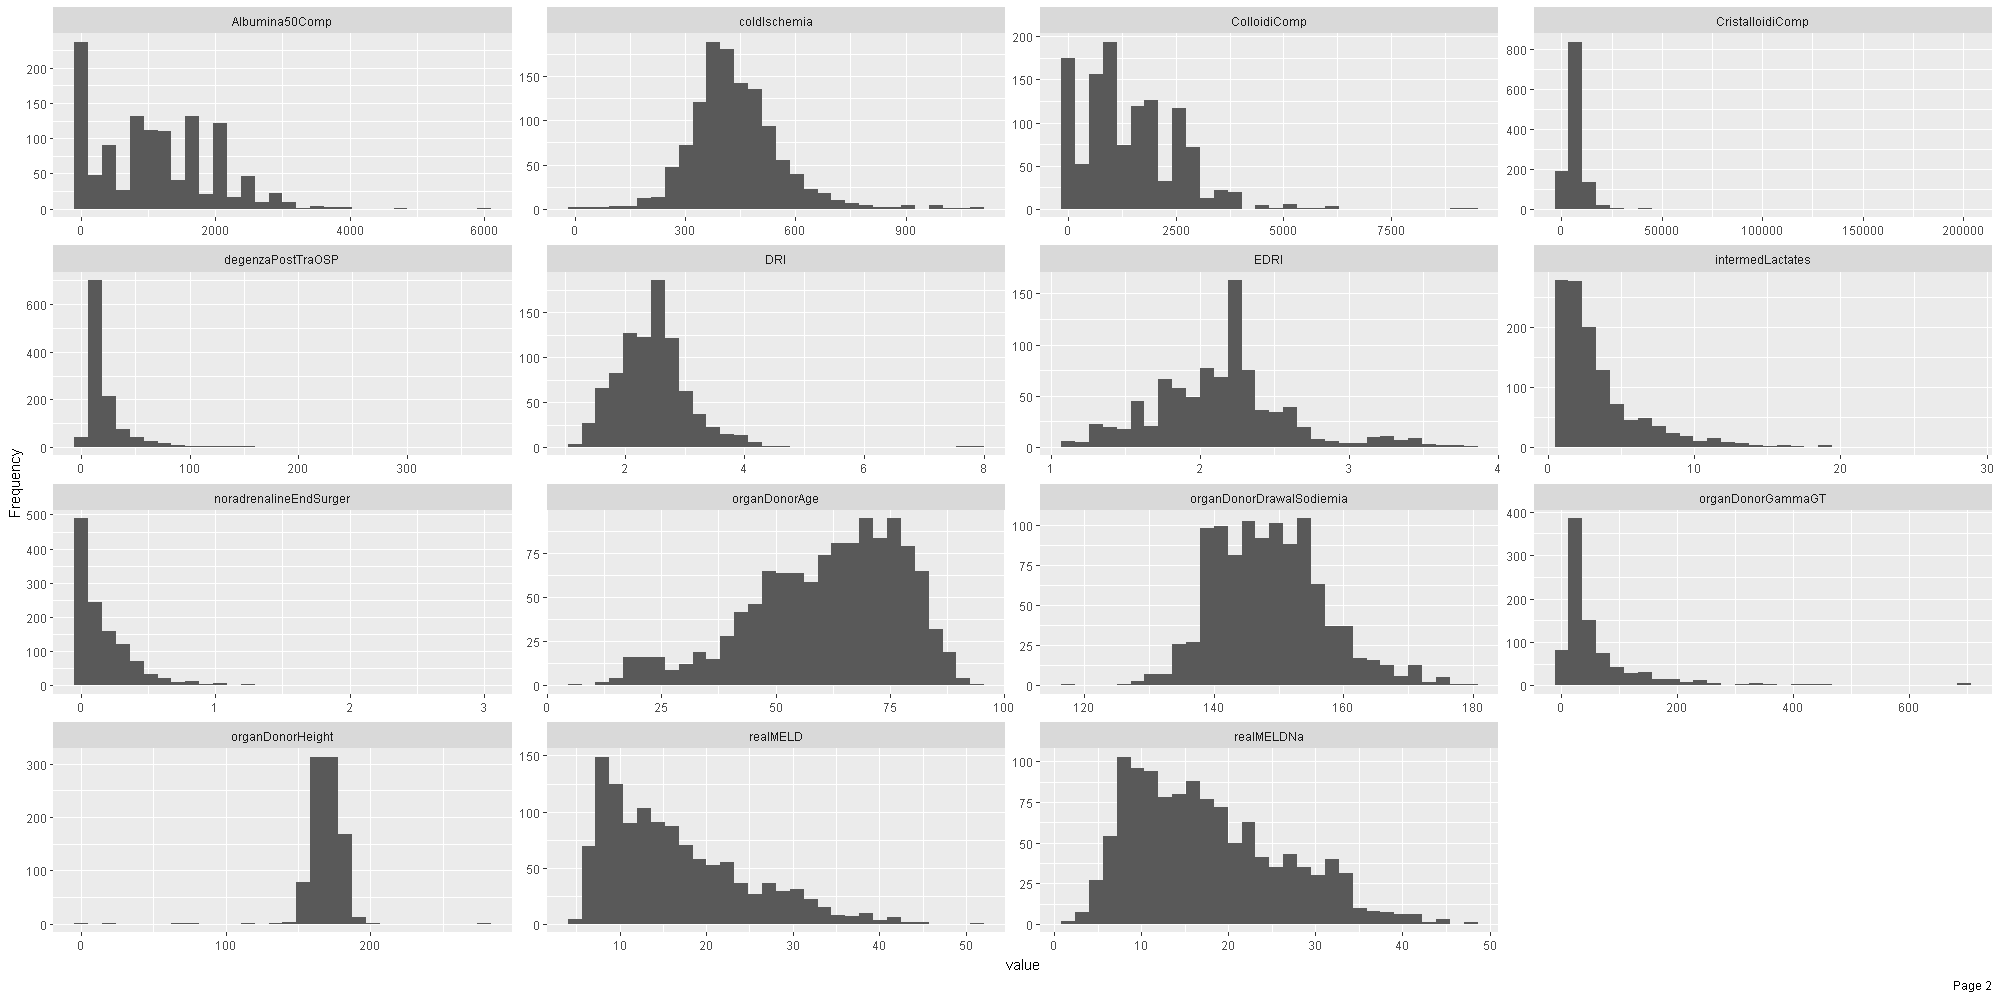

In [675]:
plot_histogram(data = df)

Positive Skew

If the coefficient of skewness is greater than 0, then the graph is said to be positively skewed with the majority of data values less than mean. Most of the values are concentrated on the left side of the graph.


Zero Skewness or Symmetric

If the coefficient of skewness is equal to 0 or approximately close to 0, then the graph is said to be symmetric and data is normally distributed.


Negatively skewed

If the coefficient of skewness is less than 0, then the graph is said to be negatively skewed with the majority of data values greater than mean. Most of the values are concentrated on the right side of the graph.

In [676]:
apply(select_if(df,is.numeric), 2, skewness, na.rm = TRUE)

age            degenzaPreTra         bilirubinaTotale 
             -1.20081044               7.32778488               2.64727378 
                     INR          serumCreatinine                 Sodiemia 
              3.72829971               4.04078339              -0.44229031 
           ratioPaO2FiO2         platCountTranspl                 albumina 
             -0.45080997               2.43202174              -0.04019523 
         surgeryDuration IntraoperativTransfected             plasmaFresco 
              1.44996786               5.51489083               7.01705787 
             plasmaPools           doseFibrinogen         CRIOprecipitated 
              2.25019254               3.89081777               4.42880836 
           useEmorecuper         CristalloidiComp             ColloidiComp 
             11.16660376              17.10434741               1.20380541 
          Albumina50Comp   noradrenalineEndSurger         intermedLactates 
              0.67632572               3.63458500               2.62769048 
            coldIschemia            organDonorAge         organDonorHeight 
              0.98944424              -0.71178256              -4.25391705 
organDonorDrawalSodiemia        organDonorGammaGT                 realMELD 
              0.47498793               3.47057366               0.97335214 
              realMELDNa                      DRI                     EDRI 
              0.64540931               1.74661710               0.60461353 
       degenzaPostTraOSP 
              5.57604463

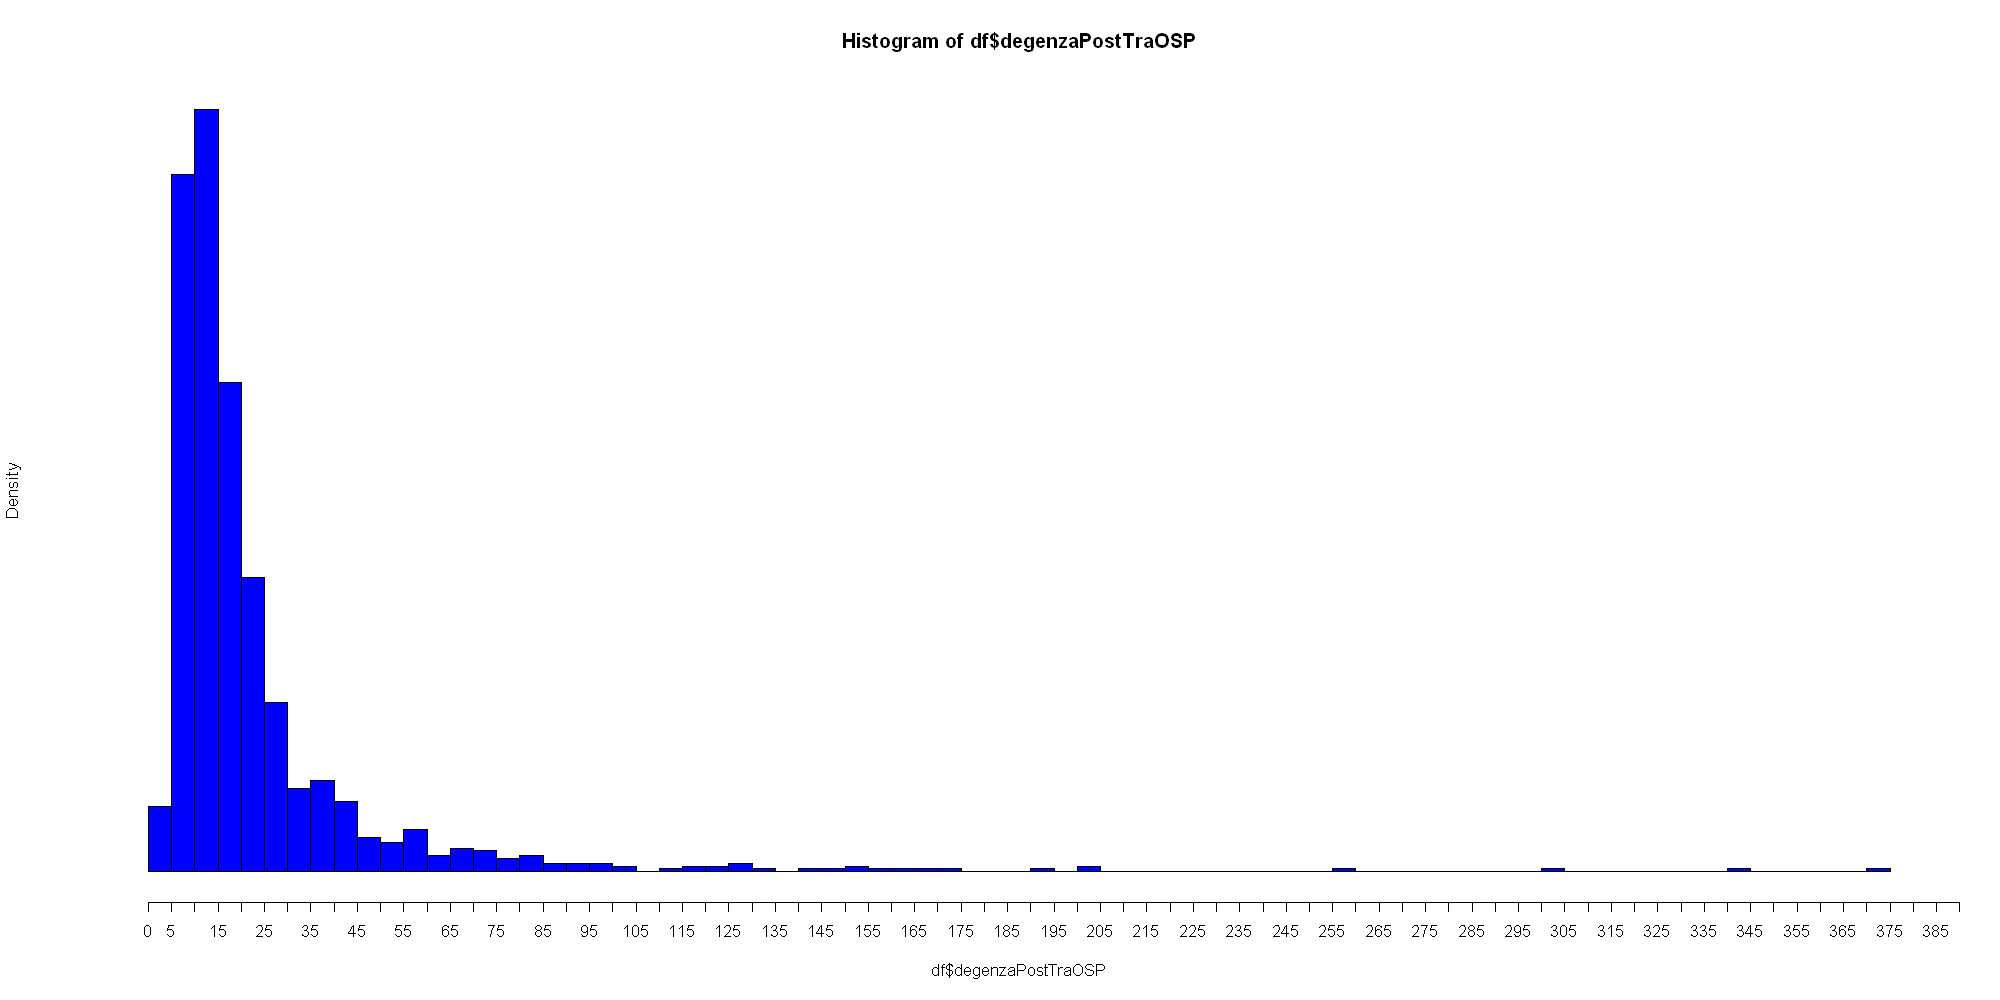

In [677]:
hist(df$degenzaPostTraOSP, freq = FALSE, axes= FALSE, breaks= 100,col="blue")

axis(1, at = seq(0, 400, by = 5))


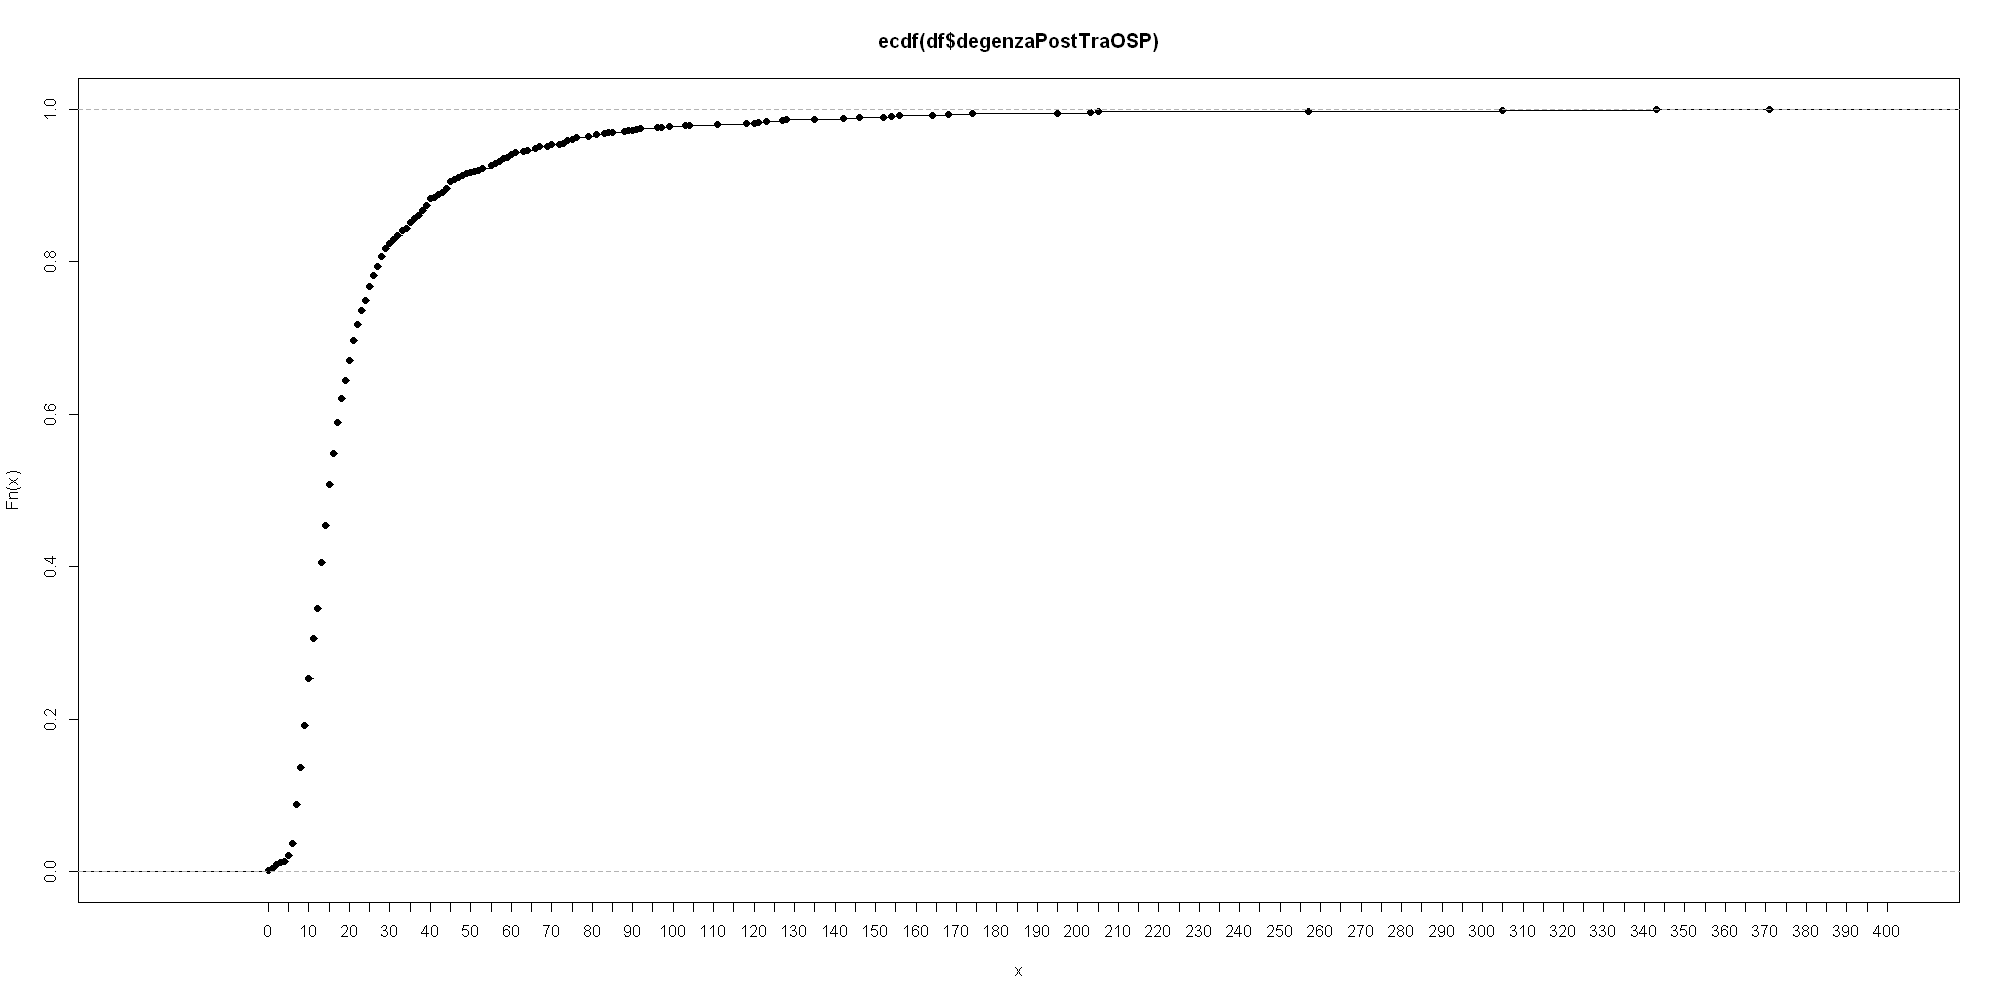

In [678]:
# calculate CDF 
CDF <- ecdf(df$degenzaPostTraOSP )
  
# draw the cdf plot
plot( CDF )
axis(1, at = seq(0, 400, by = 5))

In [679]:
df_num <- select(df,is.numeric)

In [680]:
for(i in 1:ncol(df_num)) {
  df_num[ , i][is.na(df_num[ , i])] <- mean(df_num[ , i], na.rm = TRUE)
}

In [681]:
tmp <- cor(df_num) %>%
  as.data.frame() %>%
  mutate(var1 = rownames(.)) %>%
  gather(var2, value, -var1) %>%
  arrange(desc(value)) 

tmp <- tmp[tmp$value != 1,]

In [682]:
tmp <- tmp[!duplicated(tmp$value), ]

In [683]:
df_num <- subset(df_num,select = tmp[1:40,"var1"][!duplicated(tmp[1:40,"var1"])])

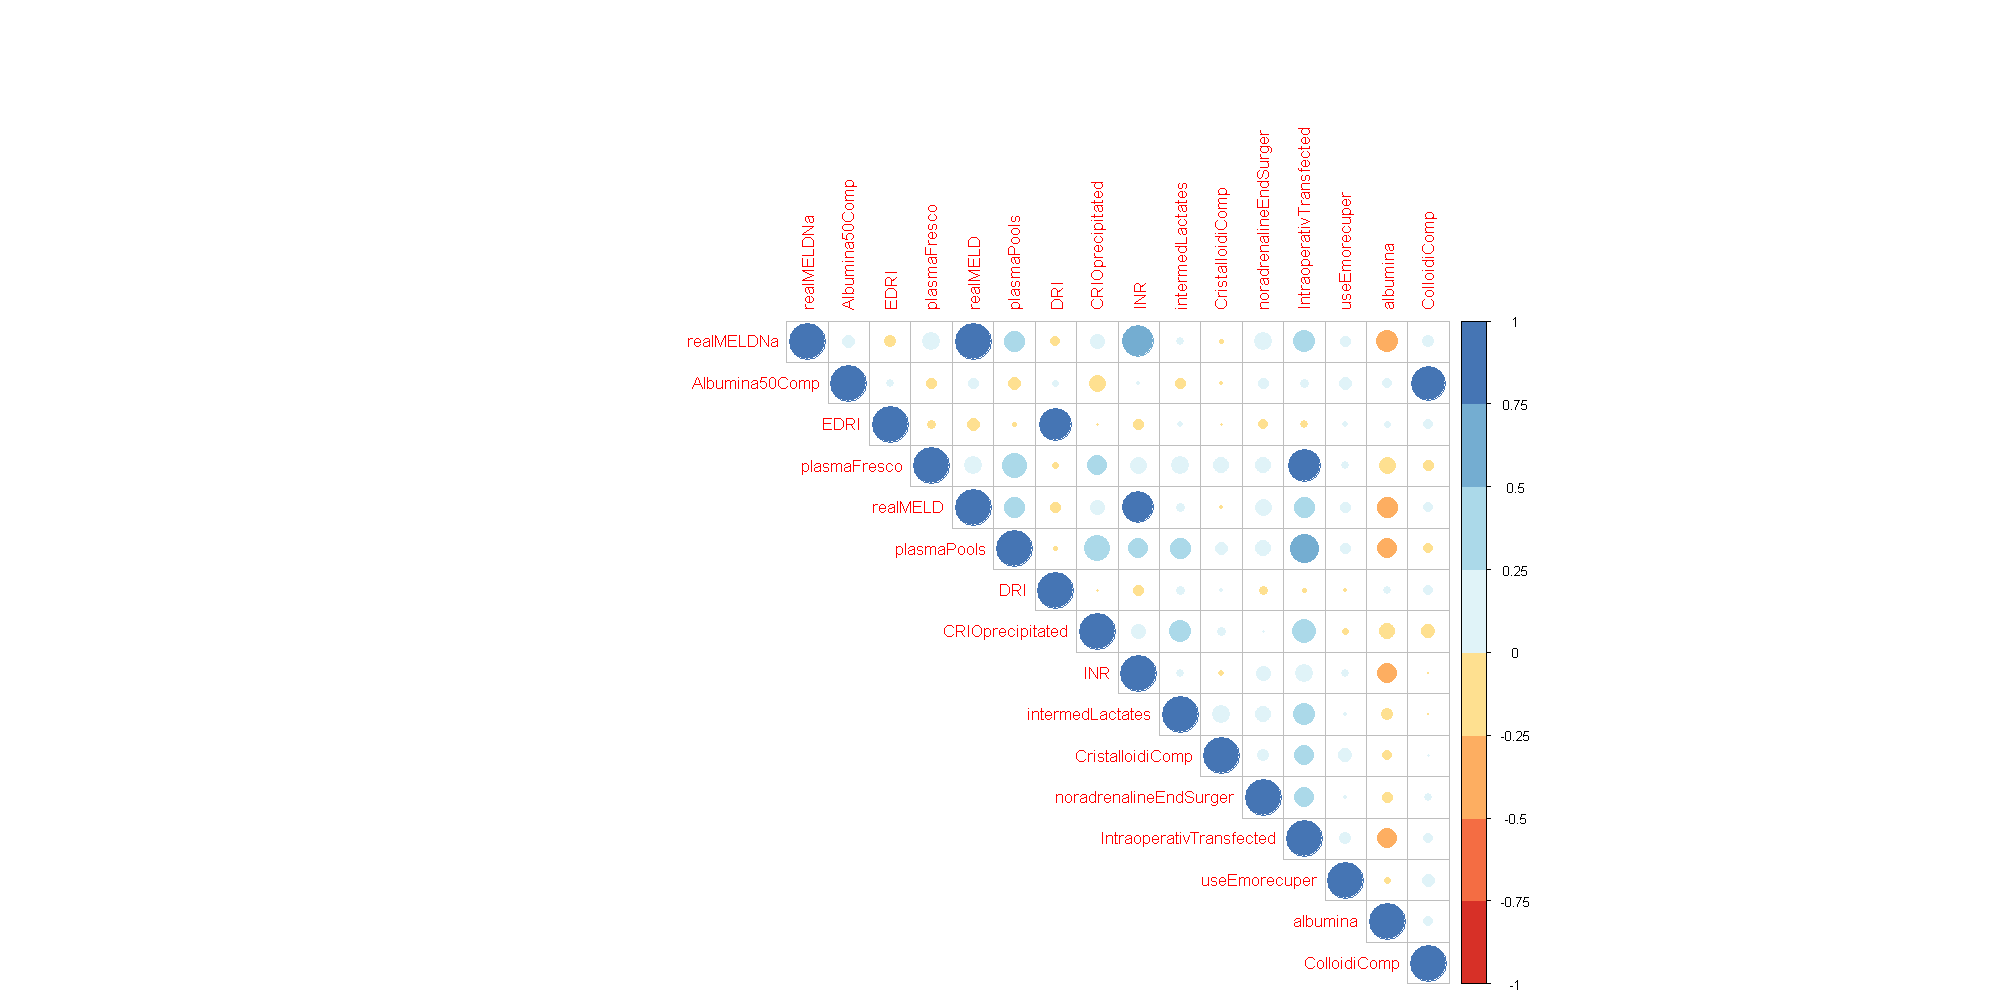

In [684]:


library(corrplot)
library(RColorBrewer)

M <-cor(df_num %>% 
          select(colnames(df_num)))

corrplot(M, type="upper", order = "original",col=brewer.pal(n=8, name="RdYlBu"))



In [685]:
tmp <- tmp[tmp$value> 0.5 | tmp$value < -0.5,]
tmp 

,var1,var2,value
32,realMELDNa,realMELD,0.9617544
34,Albumina50Comp,ColloidiComp,0.8917236
36,EDRI,DRI,0.7796333
38,plasmaFresco,IntraoperativTransfected,0.7642068
40,realMELD,INR,0.7560954
42,realMELD,bilirubinaTotale,0.7557118
44,realMELDNa,bilirubinaTotale,0.7209868
46,realMELDNa,INR,0.7199403
48,plasmaPools,IntraoperativTransfected,0.5949345
50,EDRI,organDonorAge,0.5573264


In [686]:
#correlations with objective variable

df_num <- select(df, is.numeric)

data_cor <- cor(df_num[ , colnames(df_num) != "degenzaPostTraOSP"],
                df_num$degenzaPostTraOSP, use = "complete.obs")

data_cor <- data_cor[order(data_cor[,1],decreasing=TRUE),]                                     

data_cor <- as.data.frame(data_cor)

data_cor

,data_cor
serumCreatinine,0.243163721
realMELD,0.240710274
realMELDNa,0.230474526
noradrenalineEndSurger,0.160007327
degenzaPreTra,0.156673144
IntraoperativTransfected,0.154430919
bilirubinaTotale,0.151024535
plasmaPools,0.147145356
Albumina50Comp,0.145238597
ColloidiComp,0.142887711


In [687]:
df <- df[df$CristalloidiComp >= 0,] # there are negative values (8) 

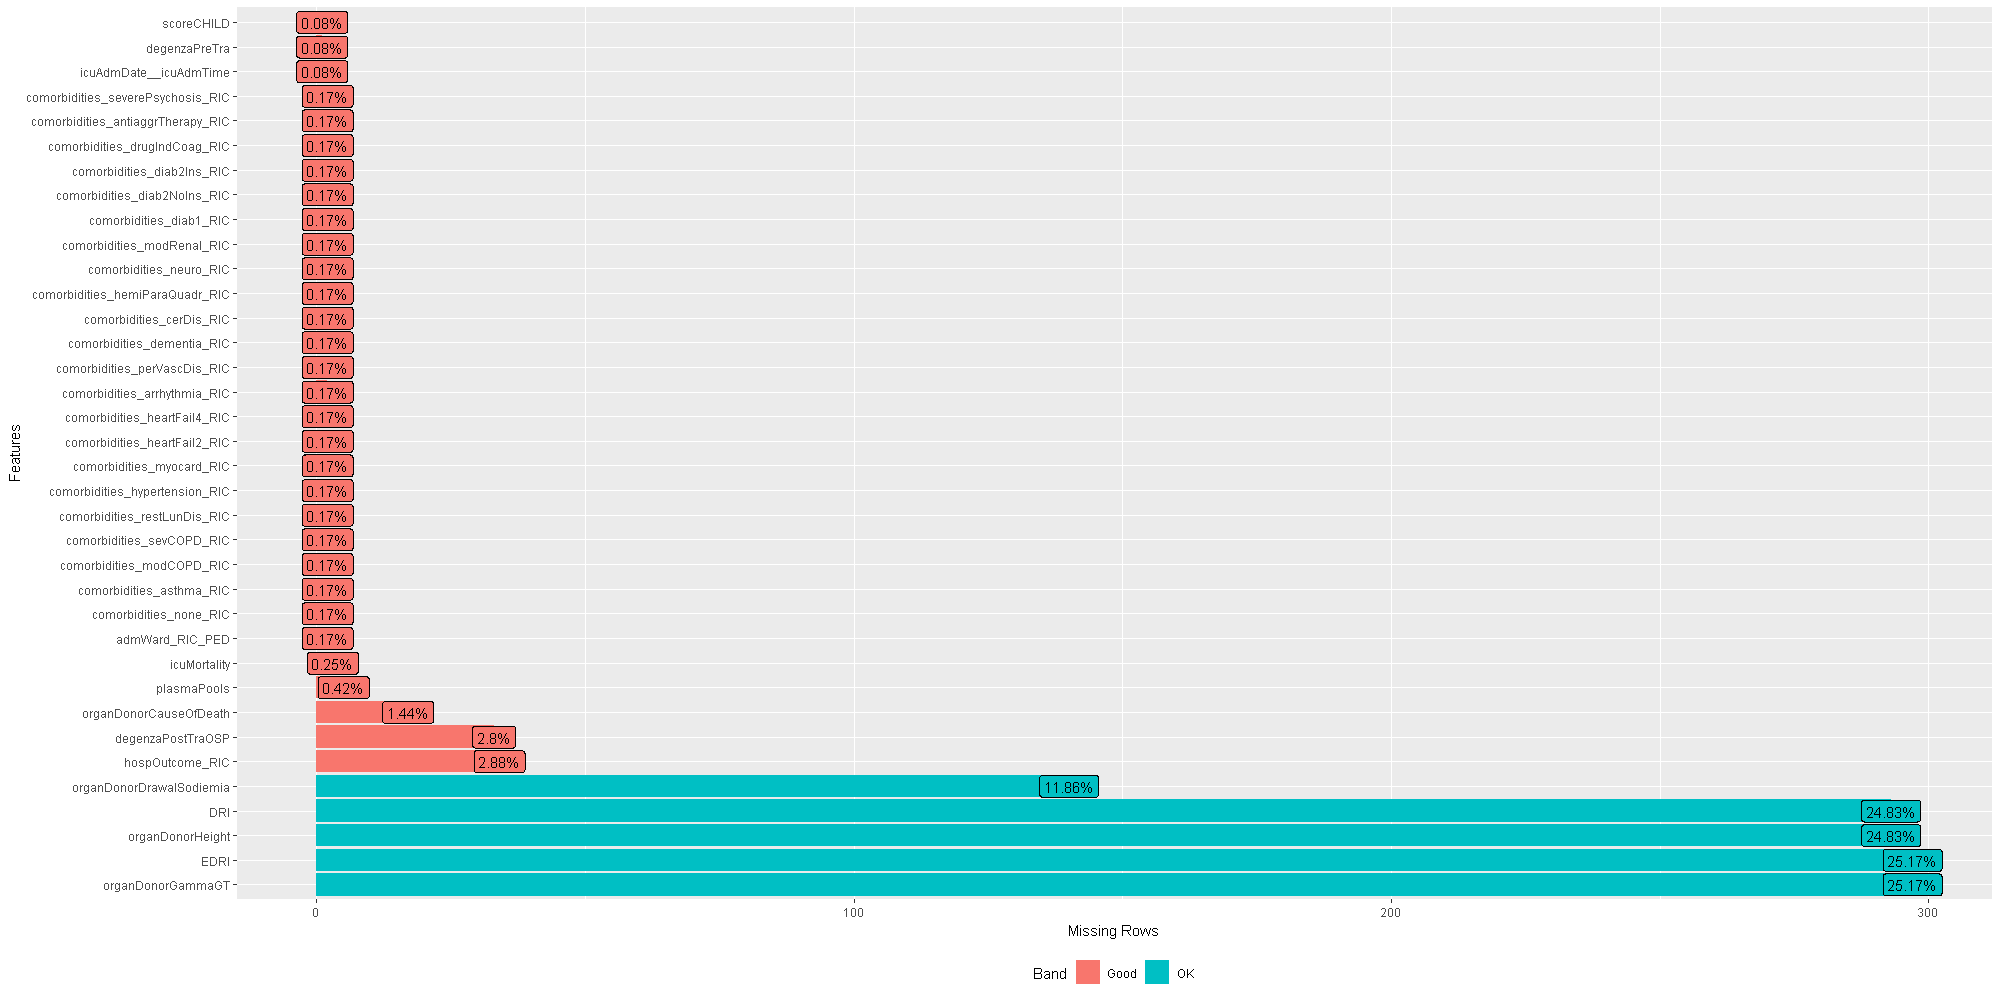

In [688]:
plot_missing(data = df,missing_only = TRUE)



# Data preparation

In [74]:
df <- df[!is.na(df$degenzaPostTraOSP),] # delete records with NA value in objective variable

In [75]:
df <- df[!(df$liverDisords_hepatFulm %in% 1)
          & !(df$liverDisords_subAcute %in% 1) ,]   # deleting retransplant, fulminant hepatitis, acute liver failure

df <- subset(df, select= -c(liverDisords_hepatFulm,liverDisords_subAcute,prevLiverTransplant))

In [76]:
# deleting combined transplant patients

load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2018/tabellaUM_OT.Rdata")

OT1 <- tabellaUM_OT
rm(tabellaUM_OT)


patients_rem <- c()


patients1 <- OT1[ OT1$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT1_rem <- OT1[!OT1$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients1){
    if (i %in% OT1_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}



load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2019/tabellaUM_OT.Rdata")

OT2 <- tabellaUM_OT
rm(tabellaUM_OT)


patients2 <- OT2[ OT2$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT2_rem <- OT2[!OT2$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients2){
    if (i %in% OT2_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}


load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2020/tabellaUM_OT.Rdata")

OT3 <- tabellaUM_OT
rm(tabellaUM_OT)

patients3 <- OT3[ OT3$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT3_rem <- OT3[!OT3$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients3){
    if (i %in% OT3_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}

load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2021/tabellaUM_OT.Rdata")

OT4 <- tabellaUM_OT
rm(tabellaUM_OT)

patients4 <- OT4[ OT4$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT4_rem <- OT4[!OT4$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients4){
    if (i %in% OT4_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}


df <- (df[!(df$patientKey %in% patients_rem),])



In [77]:
df <- df[df$CristalloidiComp >= 0,] # there are negative values (8) 

In [78]:
df <-  df %>%  #create historical eras of 6 months to account for changes in clinical and organizational practices during the periods under consideration
  mutate(Periodi_trap = case_when(
    icuAdmDate__icuAdmDate > "2018-01-01" & icuAdmDate__icuAdmDate <= "2018-12-31" ~ 1,
    icuAdmDate__icuAdmDate >= "2019-01-01" & icuAdmDate__icuAdmDate < "2019-06-30" ~ 2,
    icuAdmDate__icuAdmDate >= "2019-06-30" & icuAdmDate__icuAdmDate <= "2019-12-31" ~ 3,
    icuAdmDate__icuAdmDate >= "2020-01-01" & icuAdmDate__icuAdmDate < "2020-06-30" ~ 4,
    icuAdmDate__icuAdmDate >= "2020-06-30" & icuAdmDate__icuAdmDate <= "2020-12-31" ~ 5,
    icuAdmDate__icuAdmDate >= "2021-01-01" & icuAdmDate__icuAdmDate < "2021-06-30" ~ 6,
    icuAdmDate__icuAdmDate >= "2021-06-30" & icuAdmDate__icuAdmDate <= "2021-12-31" ~ 7,
    icuAdmDate__icuAdmDate >= "2022-01-01" & icuAdmDate__icuAdmDate < "2022-08-30" ~ 8))

df$Periodi_trap <- as.factor(df$Periodi_trap)

df <- subset(df, select = -icuAdmDate__icuAdmDate)

In [79]:
df$trap_notturno <- ifelse( df$icuAdmDate__icuAdmTime <= 11 & df$icuAdmDate__icuAdmTime >= 0, 1 , 0)

df$trap_notturno <- as.factor(df$trap_notturno)

df <- subset(df, select = -icuAdmDate__icuAdmTime)

In [80]:
df <- df %>%  
  mutate(new_admWard = case_when(      
      degenzaPreTra <= 1 ~ "HOME",
      degenzaPreTra > 1 & (admWard_RIC_PED == "medicalWard" | admWard_RIC_PED == "surgicalWard") ~ "WARD",
      degenzaPreTra > 1 & (admWard_RIC_PED == "otherIcu" | admWard_RIC_PED == "emergRoom" | admWard_RIC_PED == "highDep") ~ "ICU"))


df$new_admWard <- as.factor(df$new_admWard)

df <- subset(df, select = -admWard_RIC_PED)

In [81]:
df <-  df %>% #create a new variable mixing portosystEncephalPresent, degree and frequency
  mutate(EPScum = case_when(portosystEncephalPresent == "respNo" ~ 0,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Episodic" & (degree == "degreeI" |degree == "degreeII"))~ 1,
                            (portosystEncephalPresent == "respEffect" & frequency == "Episodic" & (degree == "degreeI" |degree == "degreeII"))~ 2,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Episodic" & (degree == "degreeIII" |degree == "degreeIV"))~ 3,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Appellant" & (degree == "degreeI" |degree == "degreeII"))~ 4,
                            (portosystEncephalPresent == "respEffect" & frequency == "Persistent" & (degree == "degreeI" |degree == "degreeII"))~ 5,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Appellant" & (degree == "degreeIII" |degree == "degreeIV"))~ 6,
                            (portosystEncephalPresent == "respEffect" & frequency == "Episodic" & (degree == "degreeIII" |degree == "degreeIV"))~ 7,
                            (portosystEncephalPresent == "respEffect" & frequency == "Persistent" & (degree == "degreeIII" |degree == "degreeIV"))~ 8))

df <- subset(df, select = - c(portosystEncephalPresent,frequency,degree))

df$EPScum <- as.factor(df$EPScum)

In [82]:
df$organDonorMaastricht <- ifelse( df$organDonorMaastricht == "classI" | df$organDonorMaastricht == "classIV"
                                        | df$organDonorMaastricht == "classV", "class_other" , df$organDonorMaastricht)

df$organDonorMaastricht <- as.factor(df$organDonorMaastricht)

In [83]:
# colestatiche




df <-  df %>% 
  mutate(colestatiche = case_when(liverDisords_cirrhosisBiliaryPrimitiv==1|liverDisords_cirrhosisBiliarySecond==1|
                                  liverDisords_primitScleroColangitis==1|
          liverDisords_extraEpathiBileDucts==1|liverDisords_otherCongenitBilia==1|
                                  liverDisords_otherCholestaticDisease==1~ 1,
                                  TRUE~ 0))

df$colestatiche <- as.factor(df$colestatiche)

df <- subset(df, select= - c(liverDisords_cirrhosisBiliaryPrimitiv,liverDisords_cirrhosisBiliarySecond,
                             liverDisords_primitScleroColangitis,liverDisords_extraEpathiBileDucts,
                            liverDisords_otherCongenitBilia, liverDisords_otherCholestaticDisease))



#rare

df <-  df %>% 
  mutate(rare = case_when(liverDisords_Hemochromatosis == 1|liverDisords_cirrhosisCryptogenetic == 1|
    liverDisords_cirrhosisOtherRaison == 1|liverDisords_otherIndication == 1|liverDisords_wilsonDisease == 1|
    liverDisords_cirrhosisDrugs == 1| liverDisords_buddChiariSyndrome == 1 | 
                          liverDisords_polycysticDisease == 1 | liverDisords_cirrhosisAutoimmune == 1 ~ 1,
                          TRUE ~ 0))

df$rare <- as.factor(df$rare)

df <- subset(df, select= - c(liverDisords_Hemochromatosis,liverDisords_cirrhosisCryptogenetic,
                             liverDisords_cirrhosisOtherRaison,liverDisords_otherIndication,liverDisords_wilsonDisease,
                            liverDisords_buddChiariSyndrome,liverDisords_polycysticDisease,liverDisords_cirrhosisAutoimmune))


#virali

df <-  df %>% 
  mutate(virali = case_when(liverDisords_cirrhosisVirusC == 1|liverDisords_cirrhosisVirusB == 1|
                            liverDisords_cirrhosisVirusD == 1|
                            liverDisords_cirrhosisVirusOther == 1 ~ 1,
                            TRUE ~ 0))

df$virali <- as.factor(df$virali)

df <- subset(df, select= - c(liverDisords_cirrhosisVirusC,liverDisords_cirrhosisVirusB,
                             liverDisords_cirrhosisVirusD,liverDisords_cirrhosisVirusOther))



#tumore

df <-  df %>% 
  mutate(tumore = case_when(liverDisords_HCCstageI == 1 | liverDisords_HCCstageII == 1 ~ 1,                 
                            TRUE ~ 0))

df$tumore <- as.factor(df$tumore)

df <- subset(df, select= - c(liverDisords_HCCstageI,liverDisords_HCCstageII))

In [84]:
#respiratorie

df <- df %>% 
    mutate(comorbidities_respiratorie = ifelse( comorbidities_asthma_RIC == 1 | comorbidities_modCOPD_RIC == 1 |
                                               comorbidities_sevCOPD_RIC == 1 | comorbidities_restLunDis_RIC == 1 |
                                               oxygenTherapy == "responsYes", 1, 0))

df$comorbidities_respiratorie <- as.factor(df$comorbidities_respiratorie)
df <- subset(df, select = -c(comorbidities_asthma_RIC,comorbidities_modCOPD_RIC, comorbidities_sevCOPD_RIC, 
                             comorbidities_restLunDis_RIC, oxygenTherapy ))






#cardiovascolari

df <- df %>% 
    mutate(comorbidities_cardiovascolari = ifelse( comorbidities_myocard_RIC == 1 | comorbidities_heartFail2_RIC == 1 |
                                               comorbidities_heartFail4_RIC == 1 | comorbidities_arrhythmia_RIC == 1 |
                                               comorbidities_perVascDis_RIC == 1, 1, 0))

df$comorbidities_cardiovascolari <- as.factor(df$comorbidities_cardiovascolari)
df <- subset(df, select = -c(comorbidities_myocard_RIC,comorbidities_heartFail2_RIC, comorbidities_heartFail4_RIC, 
                             comorbidities_arrhythmia_RIC, comorbidities_perVascDis_RIC ))


#neurologiche

df <- df %>% 
    mutate(comorbidities_neurologiche = ifelse( comorbidities_dementia_RIC == 1 | comorbidities_cerDis_RIC == 1 |
                                               comorbidities_hemiParaQuadr_RIC == 1 | comorbidities_neuro_RIC == 1 , 1, 0))

df$comorbidities_neurologiche <- as.factor(df$comorbidities_neurologiche)
df <- subset(df, select = -c(comorbidities_dementia_RIC,comorbidities_cerDis_RIC, comorbidities_hemiParaQuadr_RIC, 
                             comorbidities_neuro_RIC))


#renali

df <- df %>% 
    mutate(comorbidities_renali = ifelse( comorbidities_modRenal_RIC == 1 | comorbidities_modRenal_RIC == 1, 1, 0))

df$comorbidities_renali <- as.factor(df$comorbidities_renali)
df <- subset(df, select = -c(comorbidities_modRenal_RIC,comorbidities_modRenal_RIC))


#endocrine

df <-  df %>% 
  mutate(comorbidities_diabete = case_when(comorbidities_diab2NoIns_RIC == 1 ~ 1,
  comorbidities_diab1_RIC == 0 & comorbidities_diab2Ins_RIC == 0 & comorbidities_diab2NoIns_RIC == 0 ~ 0,
  comorbidities_diab1_RIC == 1 |comorbidities_diab2Ins_RIC == 1 ~ 2))

df$comorbidities_diabete <- as.factor(df$comorbidities_diabete)
df <- subset(df, select= - c(comorbidities_diab1_RIC,comorbidities_diab2Ins_RIC,comorbidities_diab2NoIns_RIC))

#scoagulazione

df <- df %>% 
    mutate(comorbidities_scoagulazione = ifelse( comorbidities_drugIndCoag_RIC == 1 |
                                                comorbidities_antiaggrTherapy_RIC == 1 , 1, 0))

df$comorbidities_scoagulazione <- as.factor(df$comorbidities_scoagulazione)
df <- subset(df, select = -c(comorbidities_drugIndCoag_RIC,comorbidities_antiaggrTherapy_RIC))

In [85]:
df <- df %>% 
    mutate(MELDEXCEPTION = ifelse( pulmonarHypertension == "responsYes" |
                                                epatopulmonarSyndrome == "responsYes" , 1, 0))

df$MELDEXCEPTION <- as.factor(df$MELDEXCEPTION)
df <- subset(df, select = -c(pulmonarHypertension,epatopulmonarSyndrome))

In [86]:
df <- df %>% mutate(IntraoperativTransfected = (useEmorecuper / 350) + IntraoperativTransfected )

df <- subset(df, select = -useEmorecuper)

In [87]:
df <- subset(df, select = -patientKey)
df$centreCode <- as.factor(df$centreCode)

In [88]:
tmp <- unname(unlist(quantile(df$degenzaPostTraOSP, probs = c(0.9))))
df <- df %>% mutate(degenzaPostTraOSP = case_when(hospOutcome_RIC  %in% "hospDead" ~ tmp,
                                                  icuMortality %in% 1 ~ tmp,
                                                  TRUE ~ degenzaPostTraOSP))  #add penalty in degenzaPostTraOSP for patients who died

In [89]:
quantile(df$degenzaPostTraOSP,probs = c(0, .33, .66, 1))

0%  33%  66% 100% 
   1   12   20  371

In [90]:
df$deg_cat <- cut(df$degenzaPostTraOSP ,breaks=c(0,8,18,Inf))

df <- df %>% mutate(deg_cat = case_when(deg_cat == levels(df$deg_cat)[1] ~ "Ottimo",     # discretize objective variable
                                      deg_cat == levels(df$deg_cat)[2] ~ "Accettabile",
                                      deg_cat == levels(df$deg_cat)[3] ~ "Complicato"))

df$deg_cat <- as.factor(df$deg_cat)

df <- subset(df, select = -c(hospOutcome_RIC,icuMortality))

In [ ]:
df$deg_cat <- cut(df$degenzaPostTraOSP ,breaks=quantile(df$degenzaPostTraOSP,probs = c(0, .33, .66, 1)))

df <- df %>% mutate(deg_cat = case_when(deg_cat == levels(df$deg_cat)[1] ~ "Ottimo",     # discretize objective variable
                                      deg_cat == levels(df$deg_cat)[2] ~ "Accettabile",
                                      deg_cat == levels(df$deg_cat)[3] ~ "Complicato"))

df$deg_cat <- as.factor(df$deg_cat)

df <- subset(df, select = -c(hospOutcome_RIC,icuMortality))

In [92]:
df <- subset(df, select = - c(EDRI,DRI,ColloidiComp,realMELDNa,
                              serumCreatinine,INR,bilirubinaTotale)) #delete high correlated variables and dependent variables

In [93]:
df <- df[lapply(df, function(x) sum(is.na(x))/length(x)) < 0.50] #remove column with more than 50% of NA

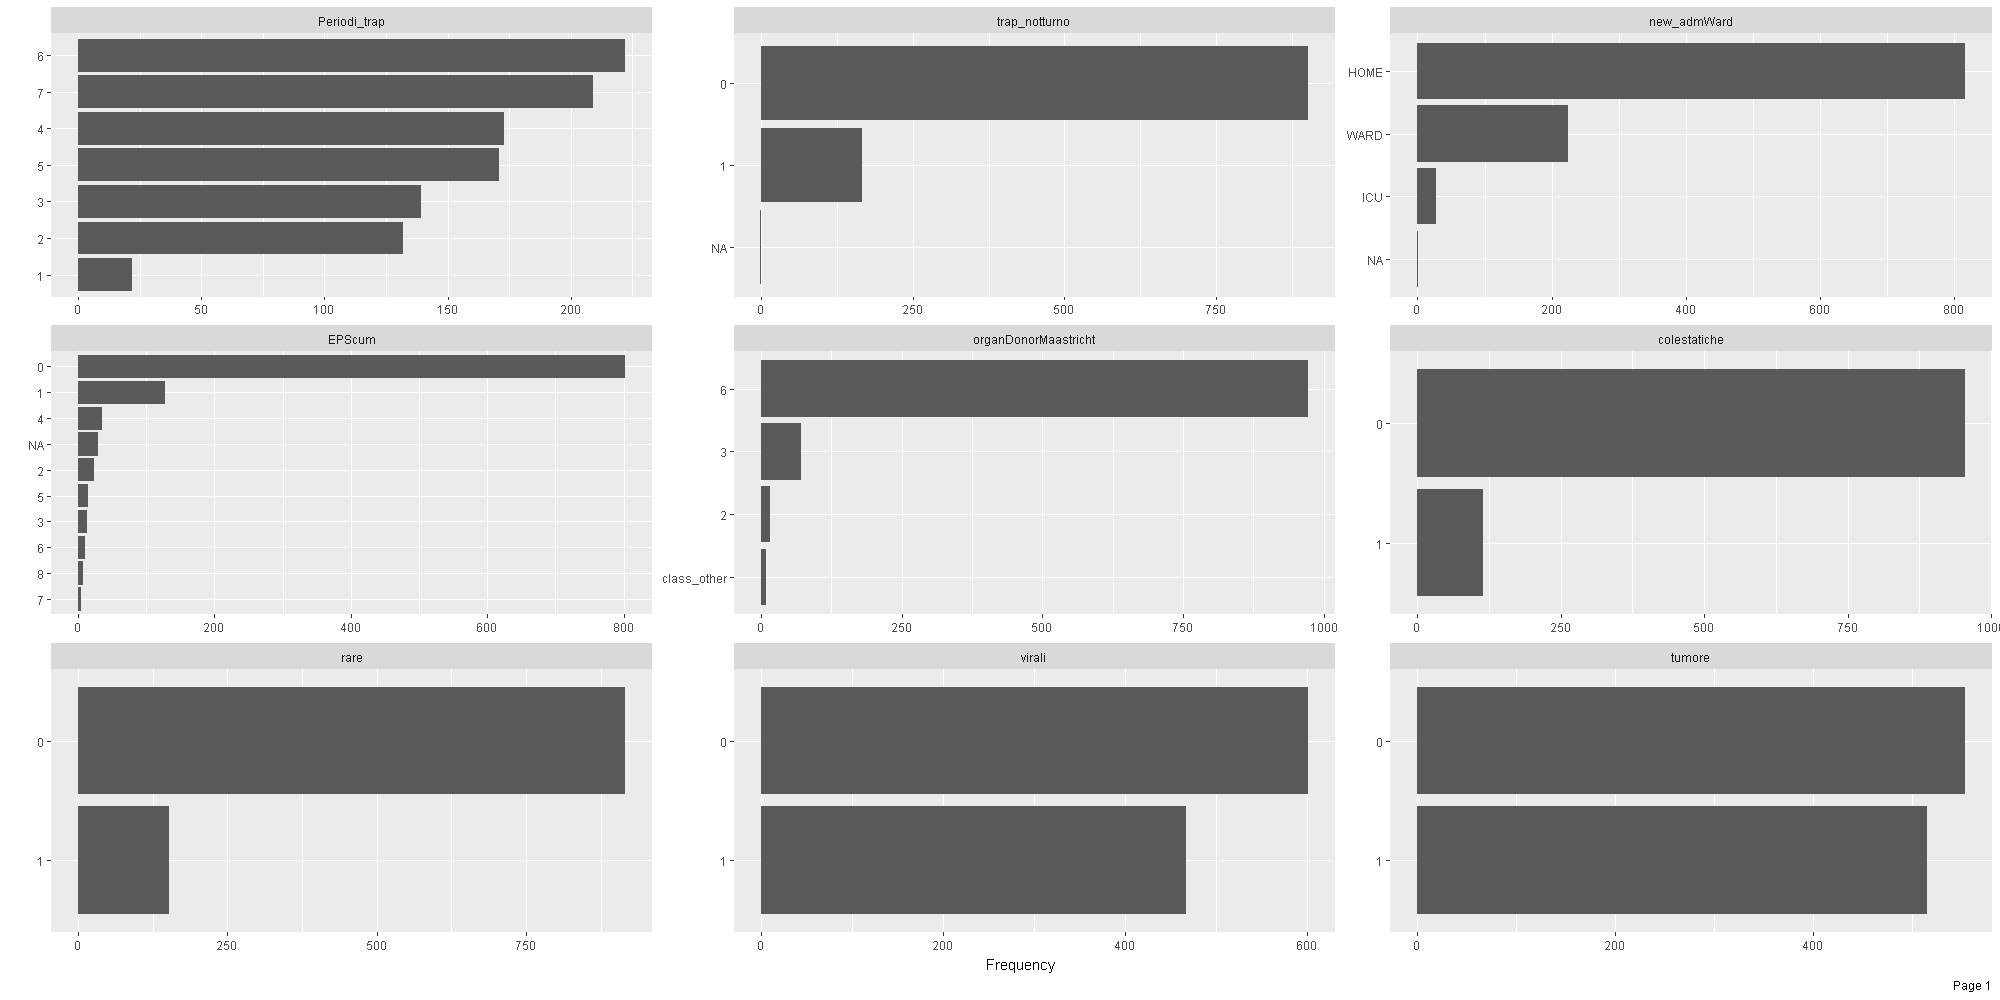

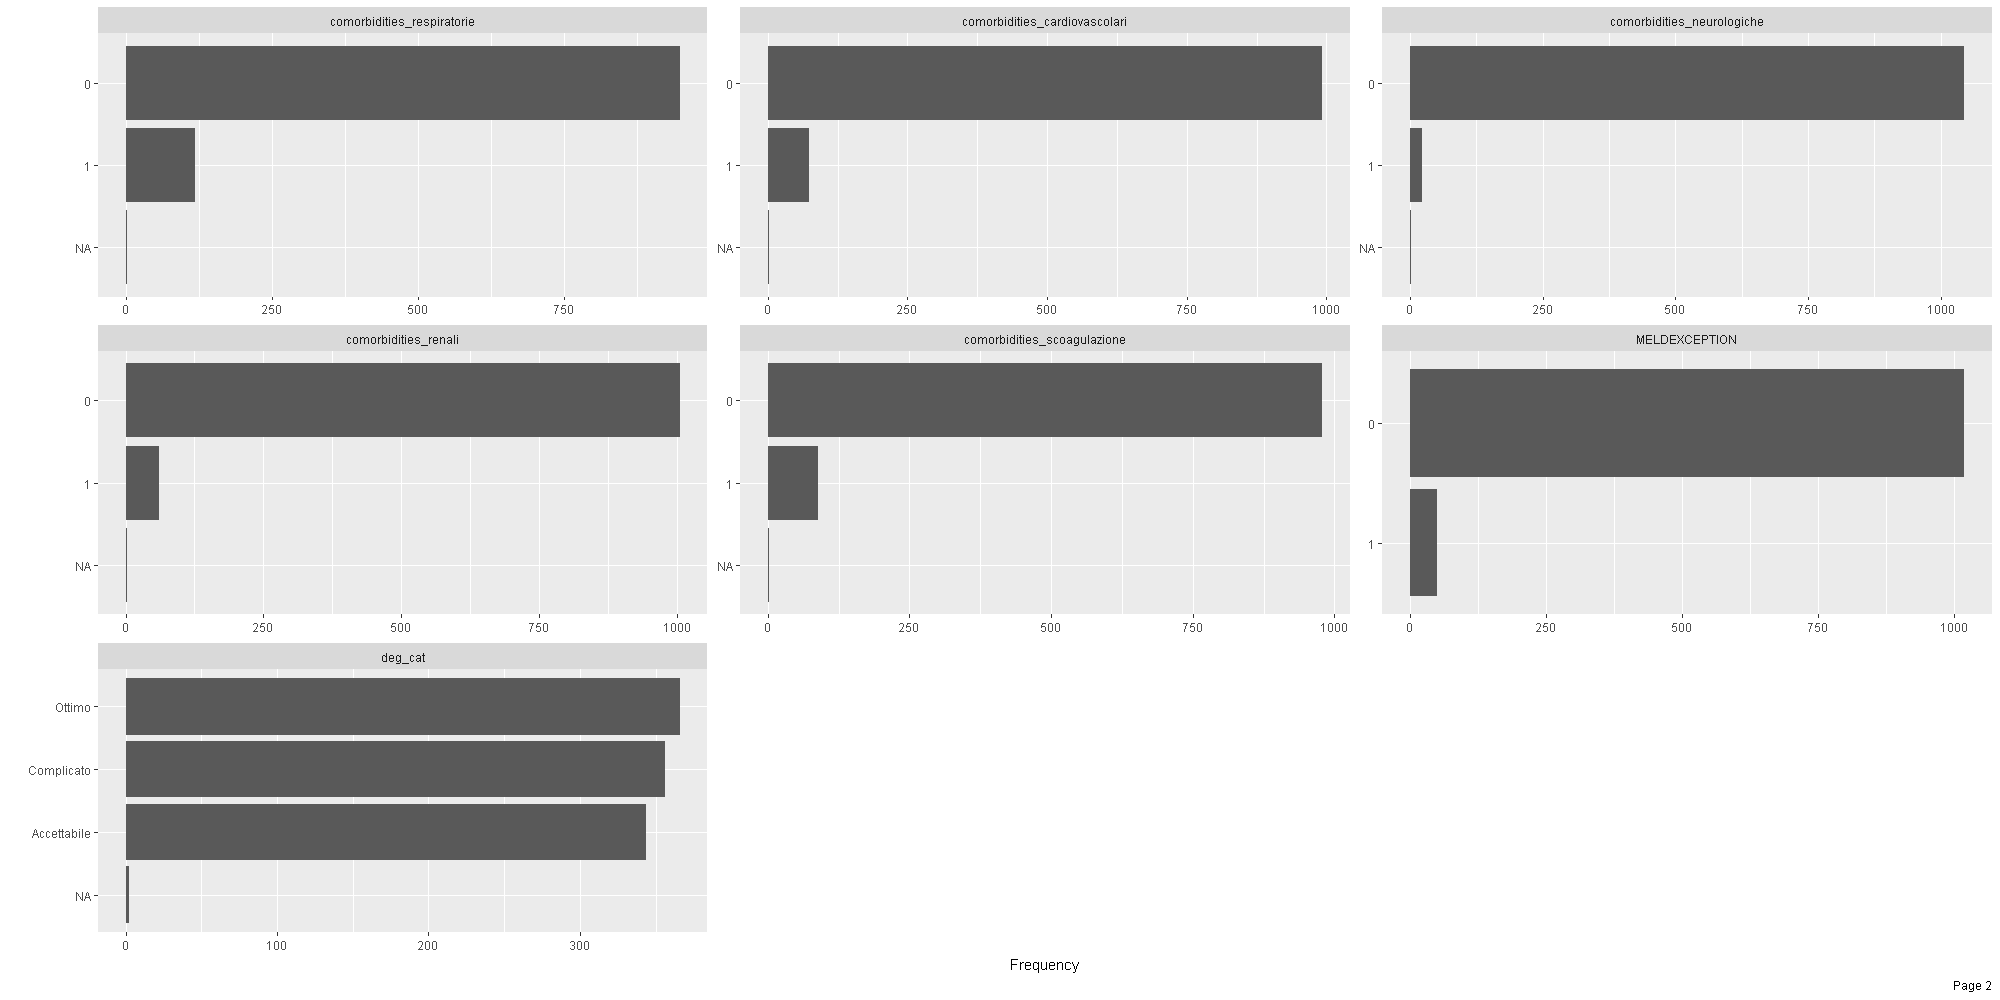

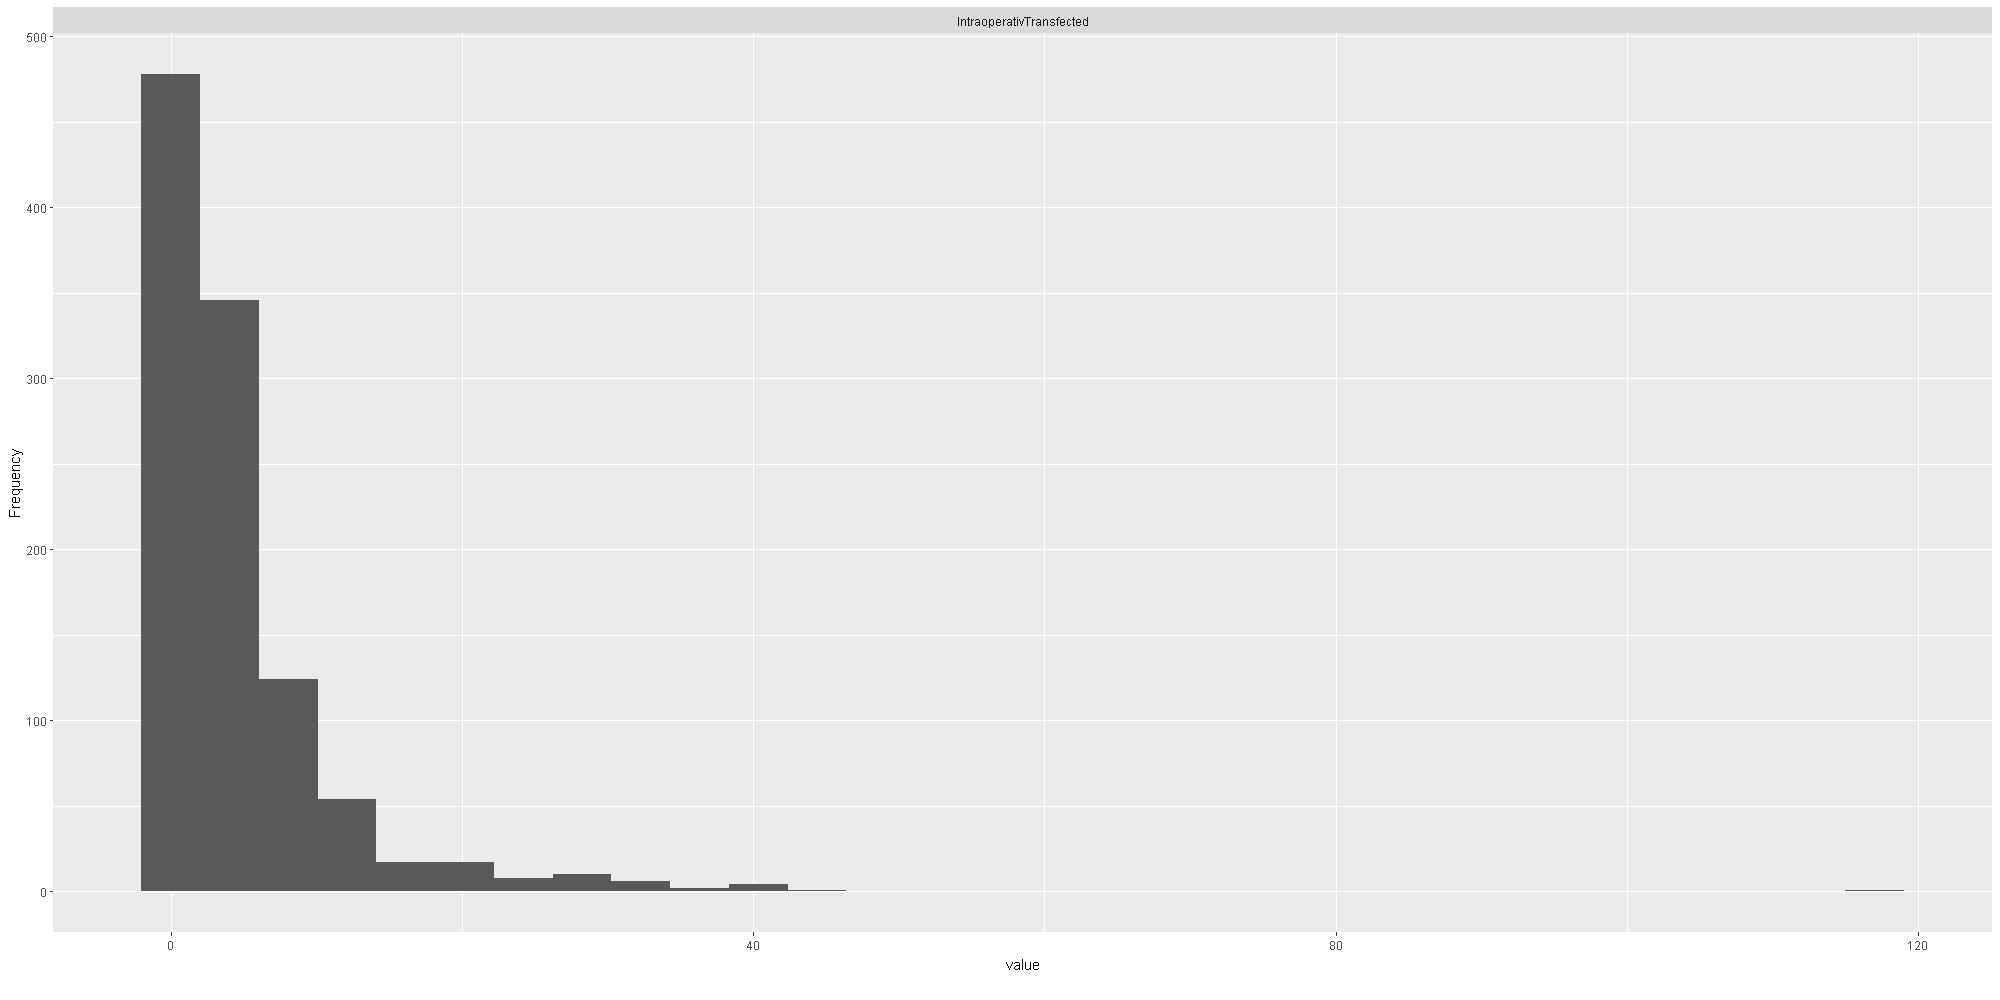

In [95]:
nuove_descrittiva <- subset(df, select= c(Periodi_trap,trap_notturno,new_admWard,EPScum,organDonorMaastricht,colestatiche,rare,virali,tumore,
comorbidities_respiratorie,comorbidities_cardiovascolari,comorbidities_neurologiche,comorbidities_renali,
comorbidities_scoagulazione,MELDEXCEPTION,deg_cat,IntraoperativTransfected))


plot_bar(data = nuove_descrittiva)

plot_histogram(data = nuove_descrittiva)

# Preprocessing

In [96]:
library(missForest)

df_imp <- missForest(df)       # fill NA

df <- df_imp$ximp

df_imp <- missForest(df)

df <- df_imp$ximp

In [97]:
tmp <- df$degenzaPostTraOSP
df <- subset(df,select= -degenzaPostTraOSP)

preProc <- preProcess(df, method = c("center","scale","BoxCox","zv"))

df <- predict(preProc, df)

In [135]:
numerical_cols <-  df %>%    #dataframe only num for linear regression
  select_if(is.numeric) %>%
  colnames()

df_num <- df %>% 
  select(all_of(numerical_cols))


df_num$degenzaPostTraOSP <- tmp

df_num$degenzaPostTraOSP <- log(df_num$degenzaPostTraOSP)


In [136]:
save(df, file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")
save(df_num, file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_num.Rdata")

In [98]:
df2 <- df
save(df2, file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df2.Rdata")